<a href="https://colab.research.google.com/github/NANDINIKeremegaladhoddiShivalingaiah/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Demand Prediction**

## **Project Type - Regression**
## **Contribution - Individual**
## **Team Member - Nandini K S**

## **Project Summary**

**1. Data Collection**

Importing libraries

Dataset Loading

About the dataset


**2. Data Cleaning**

Finding Duplicate values

Finding Missing/Null values

Understanding your variables

Handling Outliers


**3. Data Wrangling and Feature Engineering**

**4. Exploratory Data Analysis(EDA)**

Univariate Analysis

Bivariate Analysis

**5. Data Preprocessing**

Checking distribution of each feature and trensform it to normal distribution

Checking relationship between independent and dependent variables is linear

Checking multicollinearity in independent variables

Features encoding

Data Splitting

Data Scaling


**6. Supervise Machine learning algorithms and implementation**

Linear Regression

Lasso Regression

Ridge Regression

ElasticNet Regression

Decision Tree

Random Forest

XGBoost


**7.Model Evaluation**


**8. Model Explainability**


## **GitHub Link**

https://github.com/NANDINIKeremegaladhoddiShivalingaiah/Bike-Sharing-Demand-Prediction

## **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Data Description**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Begin !***

## **1. Data Collection**

### **Import Libraries**

In [1]:
#Importing Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Dataset Loading**

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
# Loading Dataset
path= '/content/drive/MyDrive/Colab Notebooks/Supervised Regression ML/SeoulBikeData.csv'
df=pd.read_csv(path, parse_dates=['Date'],encoding="ISO-8859-1")
#Using parse_dates feature 'Date' coverted to datetime64 from object datatype

## **About the dataset**

In [4]:
# First five observations
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Last five observations
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### **Dataset Rows & Columns count**

In [6]:
# Checking shape of the dataset
df.shape

(8760, 14)

In [7]:
# Checking columns name of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Dataset Information**

In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [9]:
# Basic description of Dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

## **2. Data Cleaning**

### **Duplicate Values**

In [10]:
# Checking for number of duplicated values
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


### **Missing Values/Null Values**

In [11]:
# Checking for number of null values
count_null=pd.DataFrame(df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
count_null

number_of_nulls_values
Date                                            0
Rented Bike Count                               0
Hour                                            0
Temperature(°C)                                 0
Humidity(%)                                     0
Wind speed (m/s)                                0
Visibility (10m)                                0
Dew point temperature(°C)                       0
Solar Radiation (MJ/m2)                         0
Rainfall(mm)                                    0
Snowfall (cm)                                   0
Seasons                                         0
Holiday                                         0
Functioning Day                                 0

So there are no null values.

Text(0.5, 1.0, ' Visualising Missing Values')

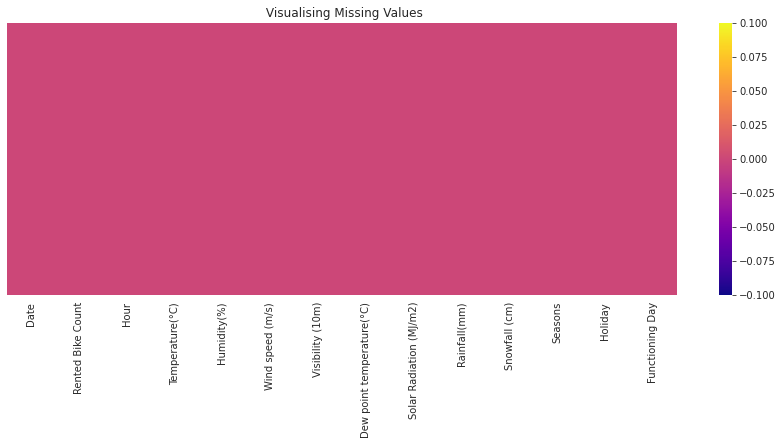

In [12]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### **Understanding Your Variables**

### Categorical variables

In [13]:
# Find categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*50)
print(categorical_variables)

There are 3 categorical variables
----------------------------------------------------------------------------------------------------
['Seasons', 'Holiday', 'Functioning Day']


In [14]:
# Checking number of categories in each categorical variables
categorical_variables_df=df[categorical_variables]
for i in categorical_variables_df.columns:
    print(categorical_variables_df[i].value_counts())
    print('--'*50)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
----------------------------------------------------------------------------------------------------
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    8465
No      295
Name: Functioning Day, dtype: int64
----------------------------------------------------------------------------------------------------


There are three categorical variables: "Seasons," "Holidays," and "Functioning Day."

### Numerical variables

In [15]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*50)
print(numerical_variables)

There are 11 numerical variables
----------------------------------------------------------------------------------------------------
['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [16]:
# Checking number of categories
numerical_variables_df=df[numerical_variables]
for i in numerical_variables_df.columns:
    print(numerical_variables_df[i].value_counts())
    print('--'*50)

2017-01-12    24
2018-09-08    24
2018-07-08    24
2018-06-08    24
2018-05-08    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64
----------------------------------------------------------------------------------------------------
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64
----------------------------------------------------------------------------------------------------
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64
----------------------------------------------------------------------------------------------------
 19.1    40
 20.5    40

Date, Rented Bike Count, Hour, Temperature (°C),Humidity (%), Wind speed (m/s), Visibility (10 m), Dew point temperature (°C), Solar Radiation (MJ/m2),Rainfall (mm) and Snowfall (cm) are total 11 numerical variables.

## **Handling Outliers**

____________________________________________________________________________________________________


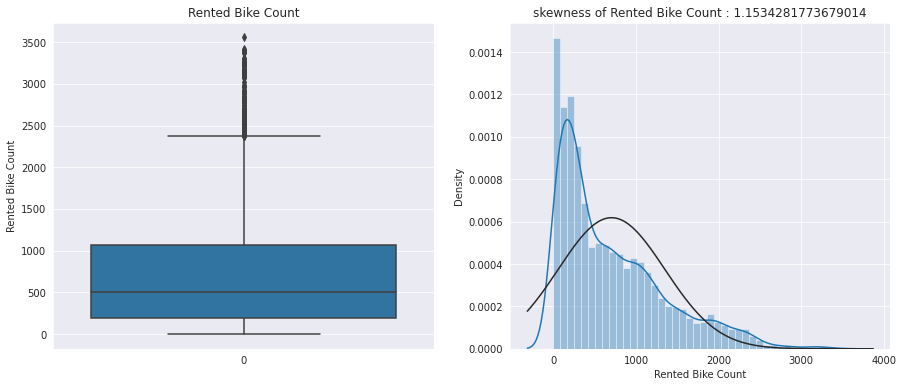

____________________________________________________________________________________________________


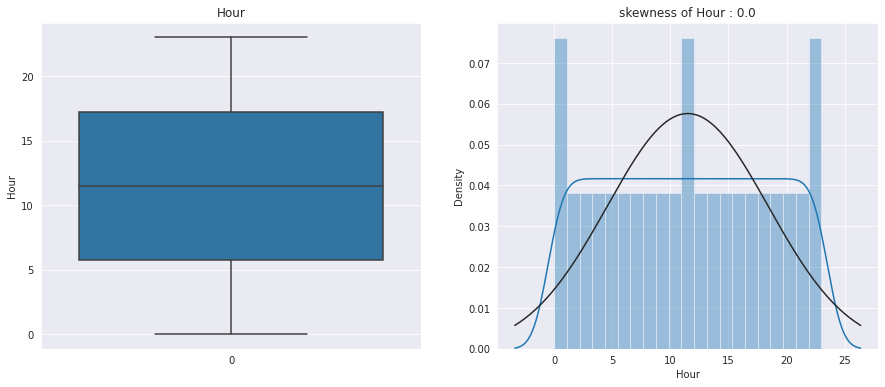

____________________________________________________________________________________________________


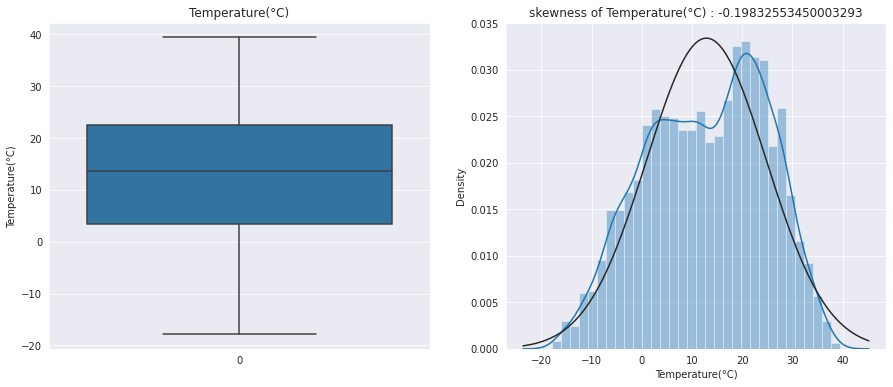

____________________________________________________________________________________________________


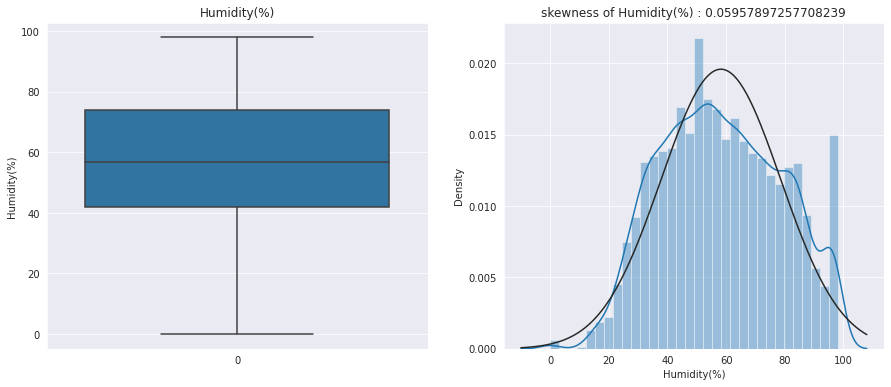

____________________________________________________________________________________________________


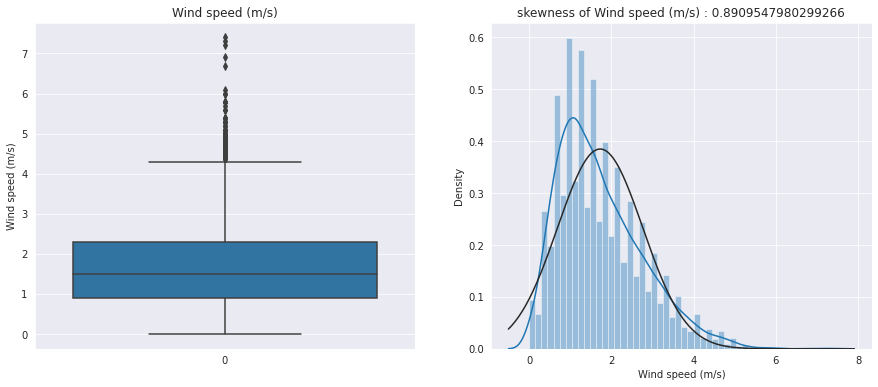

____________________________________________________________________________________________________


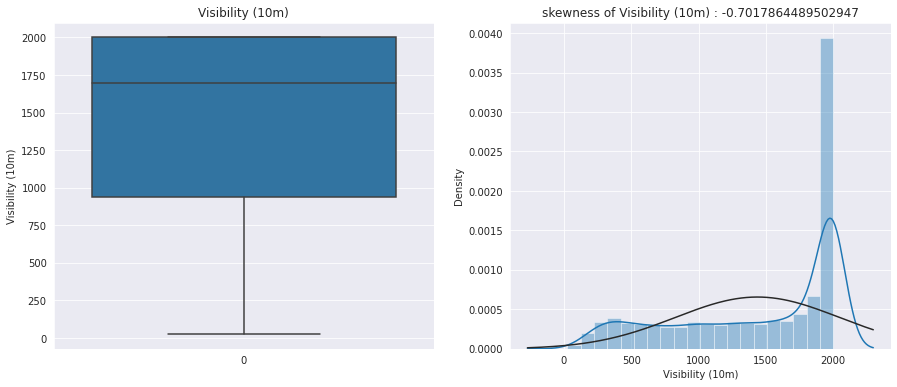

____________________________________________________________________________________________________


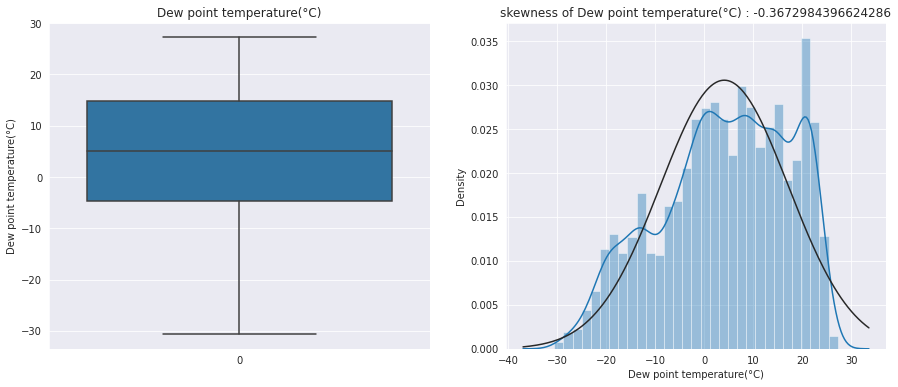

____________________________________________________________________________________________________


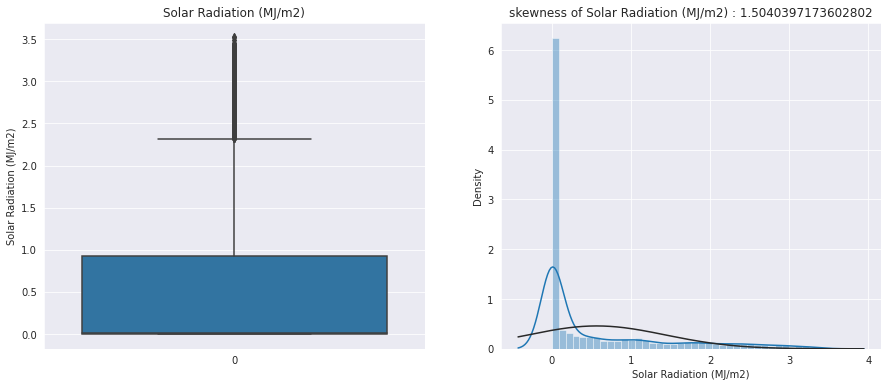

____________________________________________________________________________________________________


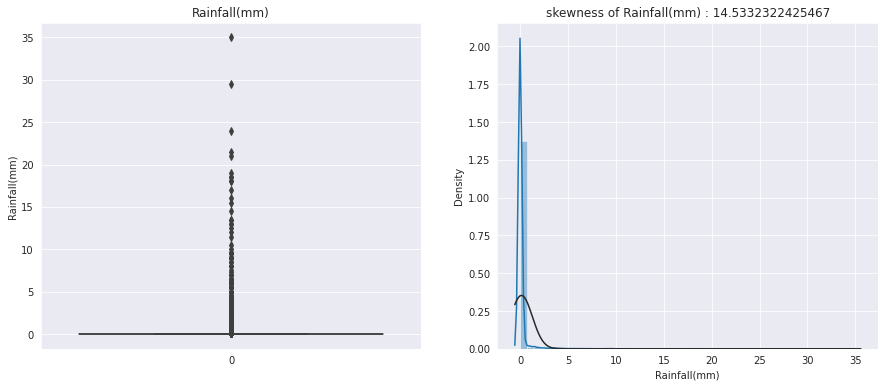

____________________________________________________________________________________________________


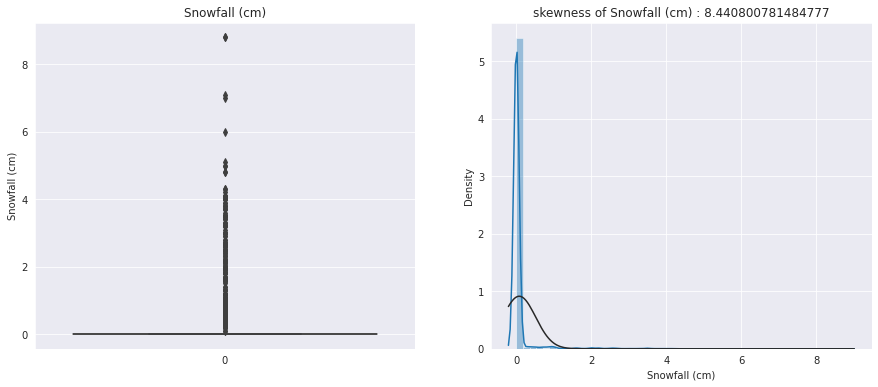

In [17]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot 
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

The variables Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm) and Snowfall (cm) have outliers. Rainfall (mm) and Snowfall (cm) have a flat interquartile range; it is best to remove those columns

In [18]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var=['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


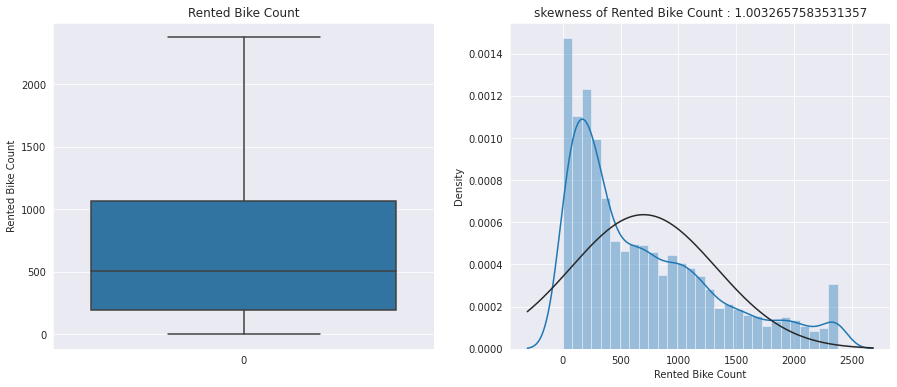

____________________________________________________________________________________________________


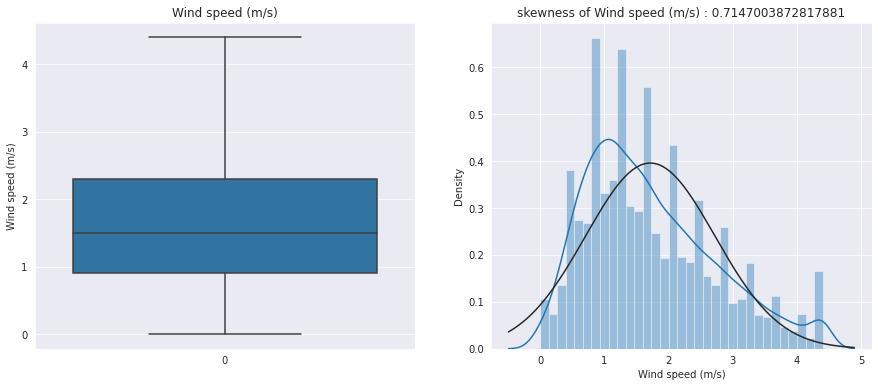

____________________________________________________________________________________________________


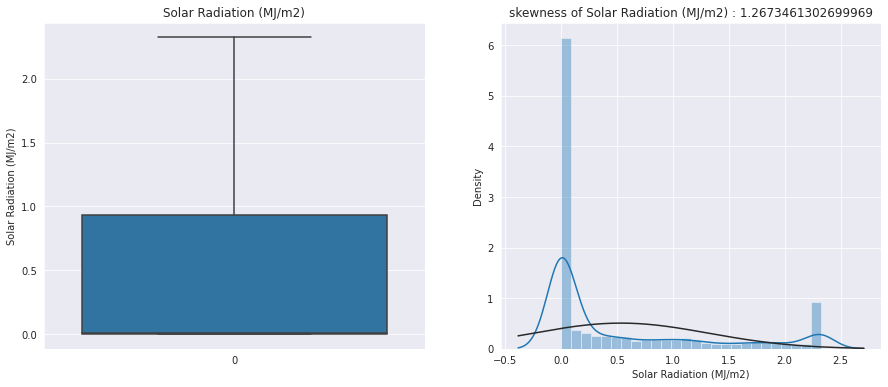

In [19]:
# Checking outliers for after removing it

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

Outliers are successfully removed from datasets.

In [20]:
# Final Basic description of dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          698.789812    11.500000        12.882922    58.226256   
std           626.910124     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          2376.625000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.715993       1436.825799                   4.073813   
std            1.008186        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            4.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.536235      0.148687       0.075068  
std                   0.785364      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   2.325000     35.000000       8.800000

## **3. Data Wrangling and Feature Engineering**

In [21]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12              254.0     0             -5.2           37   
1 2017-01-12              204.0     1             -5.5           38   
2 2017-01-12              173.0     2             -6.0           39   
3 2017-01-12              107.0     3             -6.2           40   
4 2017-01-12               78.0     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [22]:
# Checking unique values from each variable
for i in df.columns:
    print(f'{i} : {df[i].unique()}')
    print('--'*50)

Date : ['2017-01-12T00:00:00.000000000' '2017-02-12T00:00:00.000000000'
 '2017-03-12T00:00:00.000000000' '2017-04-12T00:00:00.000000000'
 '2017-05-12T00:00:00.000000000' '2017-06-12T00:00:00.000000000'
 '2017-07-12T00:00:00.000000000' '2017-08-12T00:00:00.000000000'
 '2017-09-12T00:00:00.000000000' '2017-10-12T00:00:00.000000000'
 '2017-11-12T00:00:00.000000000' '2017-12-12T00:00:00.000000000'
 '2017-12-13T00:00:00.000000000' '2017-12-14T00:00:00.000000000'
 '2017-12-15T00:00:00.000000000' '2017-12-16T00:00:00.000000000'
 '2017-12-17T00:00:00.000000000' '2017-12-18T00:00:00.000000000'
 '2017-12-19T00:00:00.000000000' '2017-12-20T00:00:00.000000000'
 '2017-12-21T00:00:00.000000000' '2017-12-22T00:00:00.000000000'
 '2017-12-23T00:00:00.000000000' '2017-12-24T00:00:00.000000000'
 '2017-12-25T00:00:00.000000000' '2017-12-26T00:00:00.000000000'
 '2017-12-27T00:00:00.000000000' '2017-12-28T00:00:00.000000000'
 '2017-12-29T00:00:00.000000000' '2017-12-30T00:00:00.000000000'
 '2017-12-31T00:00

In [23]:
# Performing feature engineering on feature Date
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [24]:
# Dropping original  Date feature after performing feature engineering
df.drop(columns='Date', axis=1, inplace=True)

In [25]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   int64

In [26]:
# Checking dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes   12   
1           0.0            0.0  Winter  No Holiday             Yes   12   
2           0.0            0.0  Winter  No Holiday             Yes   12   
3           0.0            0.0  Winter  No Holiday             Yes   12   
4           0.0            0.0  Winter  No Holiday             Yes   12   

   month  year  
0      1  2017  
1      1  2017  
2      1  2017  
3      1  2017  
4      1  2017

The variables day, month, and year were created from the variable Date, and the original variables were deleted.

## **4. Exploratory data analysis**

###**Univariate Analysis**

In [27]:
# Obtaing target variable
excluded_variables=[var for var in df.columns if len(df[var].value_counts()) > 15]
target_variables=[var for var in df.columns if var not in excluded_variables]

# Defining r to autofit the number and size of plots
r = int(len(target_variables)/3 +1)

In [28]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

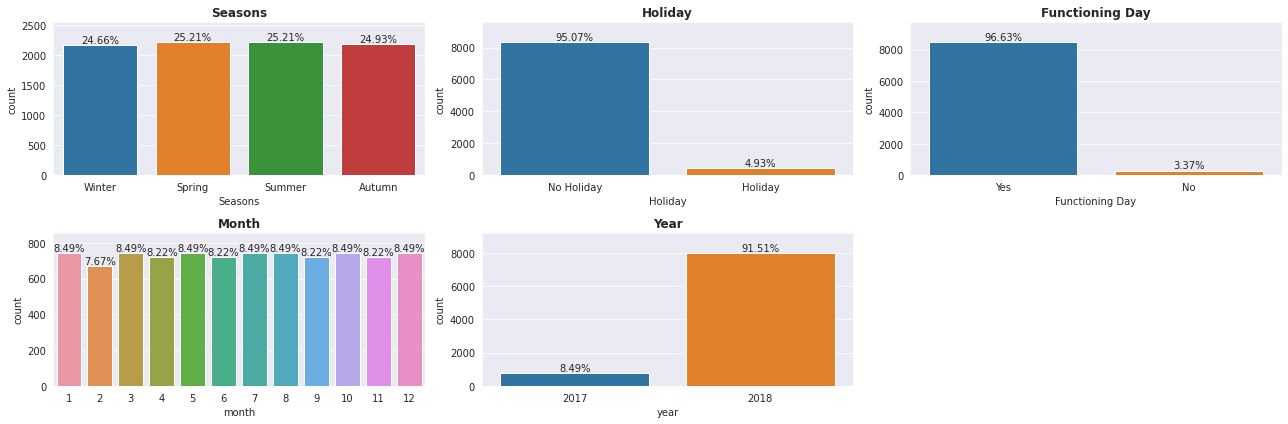

In [29]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**Observations :**

* Customers favour rental motorcycles equally in all seasons.

* When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.

* Nearly all consumers preferred to rent bikes during functional hours.

* Bicycle rentals are popular all month long.

* Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.

### **Bivariate Analysis**

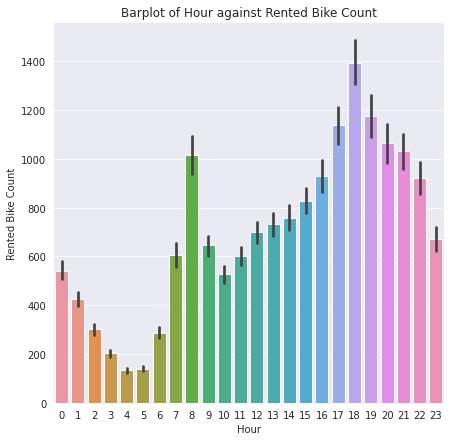

In [30]:
# Plotting graph of 'Hour' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.barplot(x="Hour", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Hour against Rented Bike Count')
plt.show()

**Observations :**

* At night, customers do not prefer to use rented bikes.

* Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.

* Customers mostly use rented bikes for transportation in the evening.

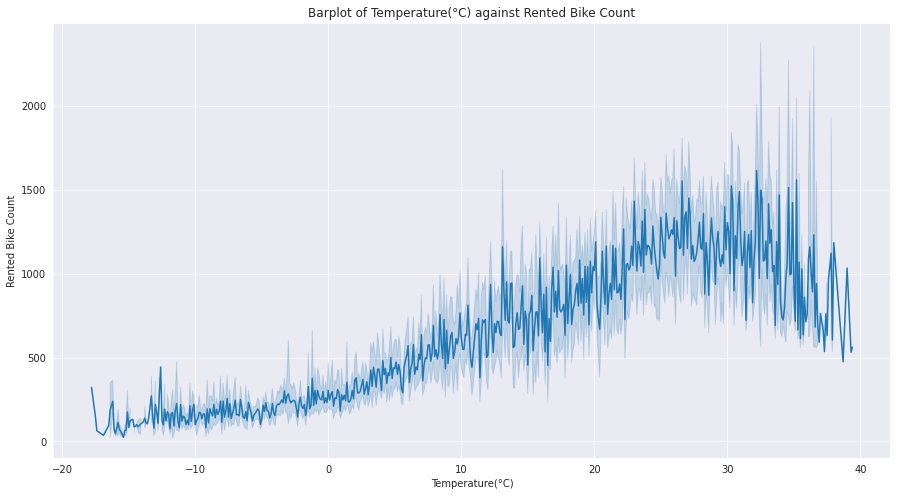

In [31]:
# Checking effect of temperature(°C) on rented bike use
plt.figure(figsize=(15,8))
ax=sns.lineplot(x="Temperature(°C)", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Temperature(°C) against Rented Bike Count')
plt.show()

**Observations :**

* Most customers use a rented bike when the temperature is normal, but when the temperature is below normal, people do not use a rented bike.

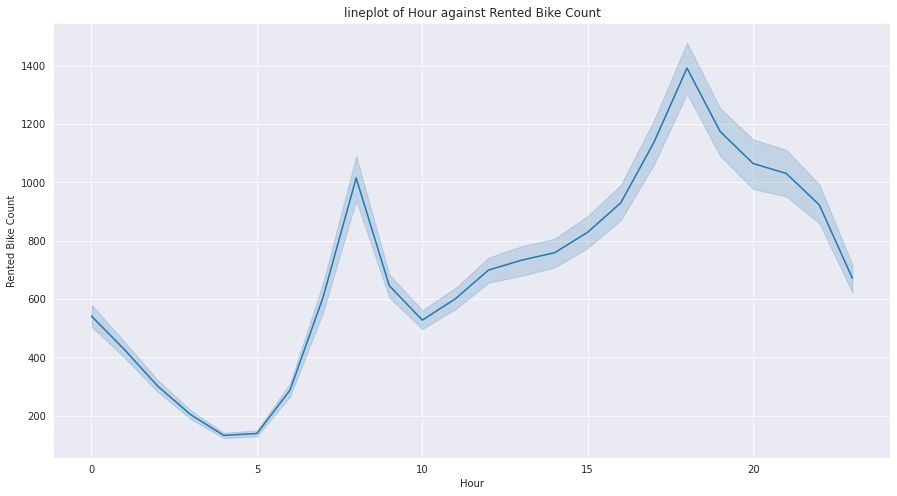

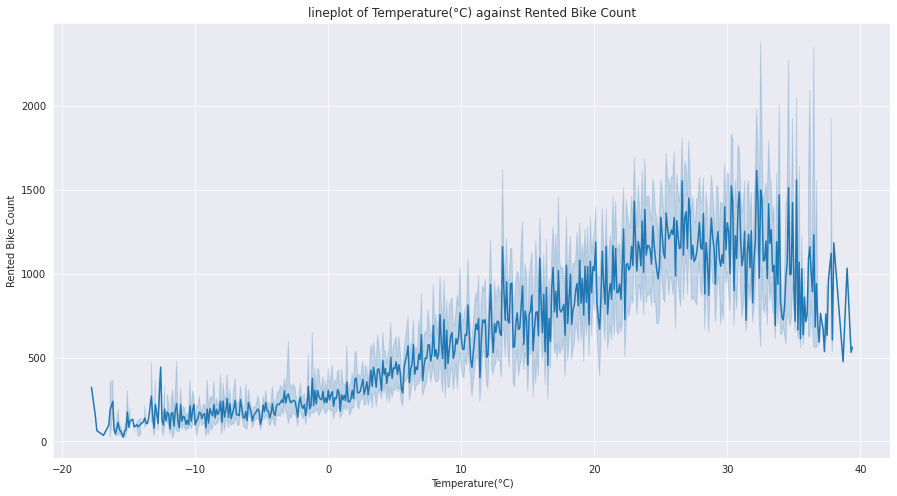

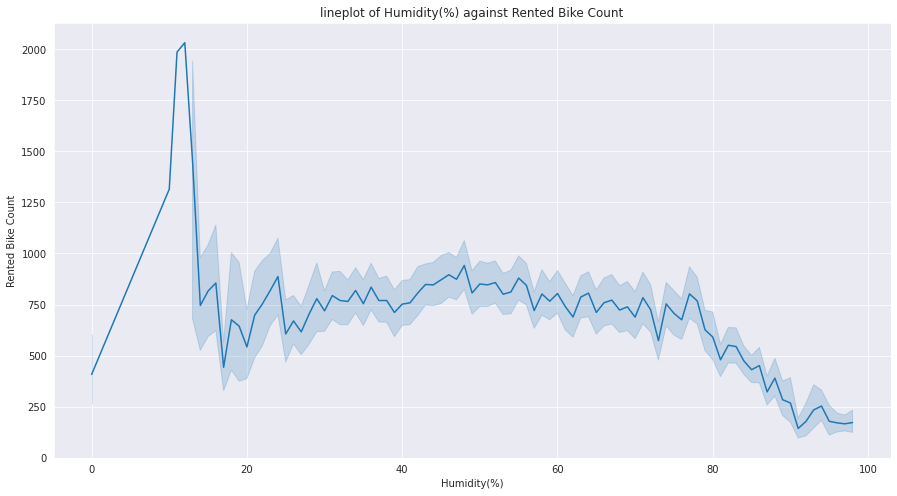

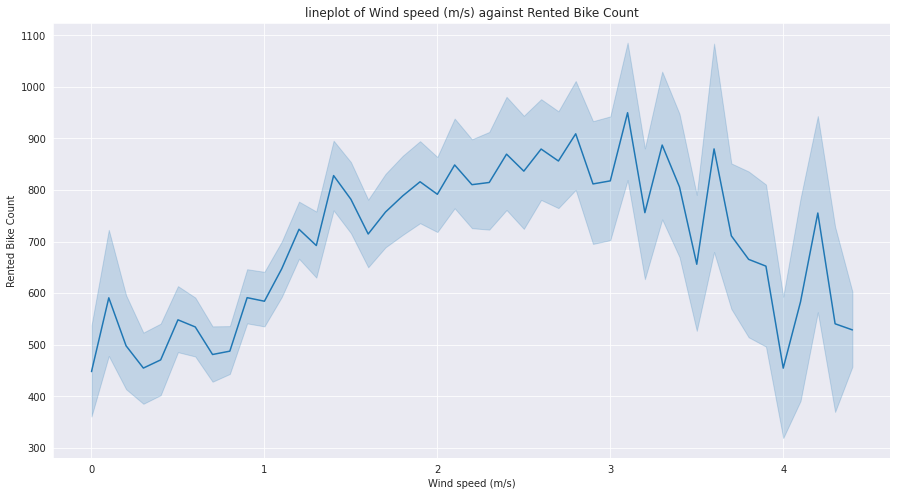

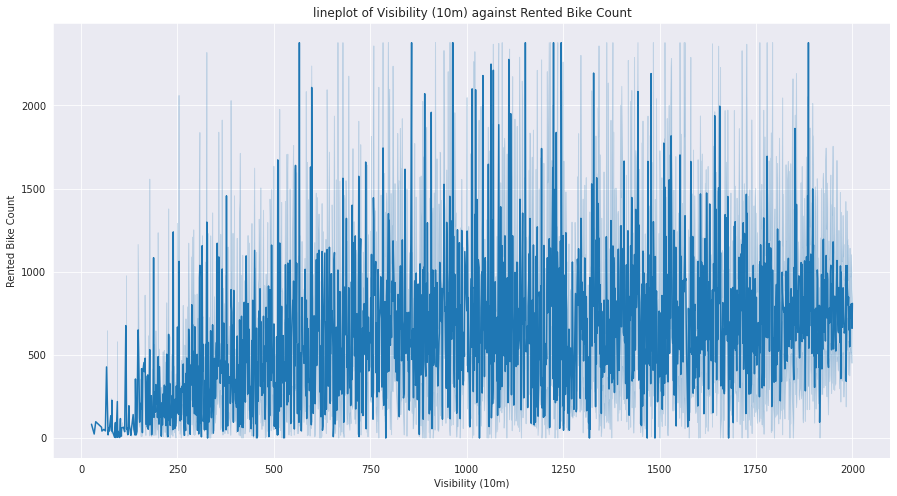

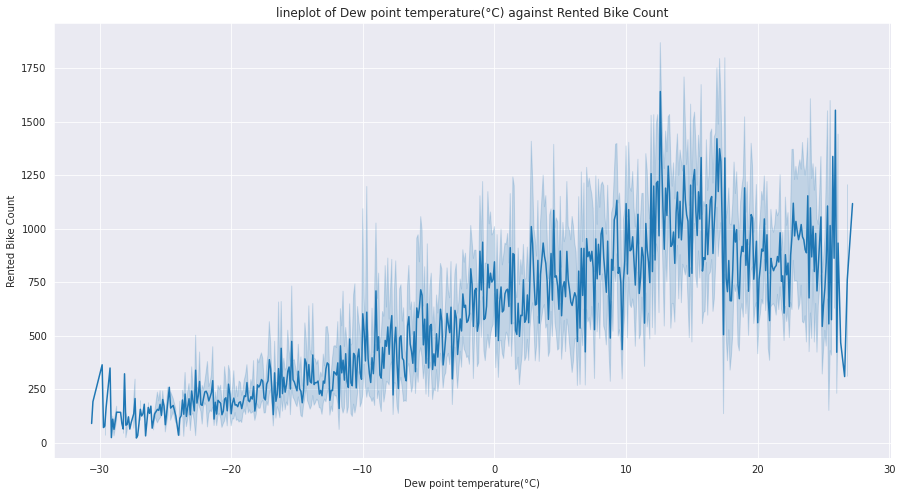

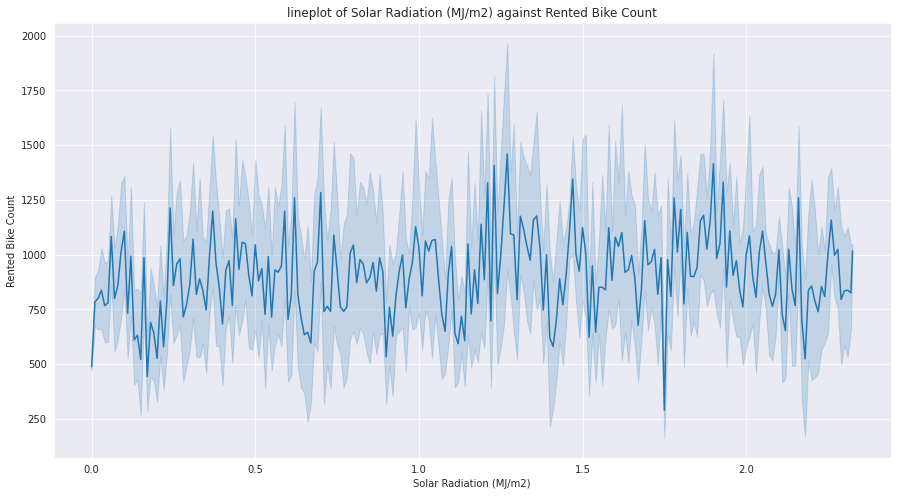

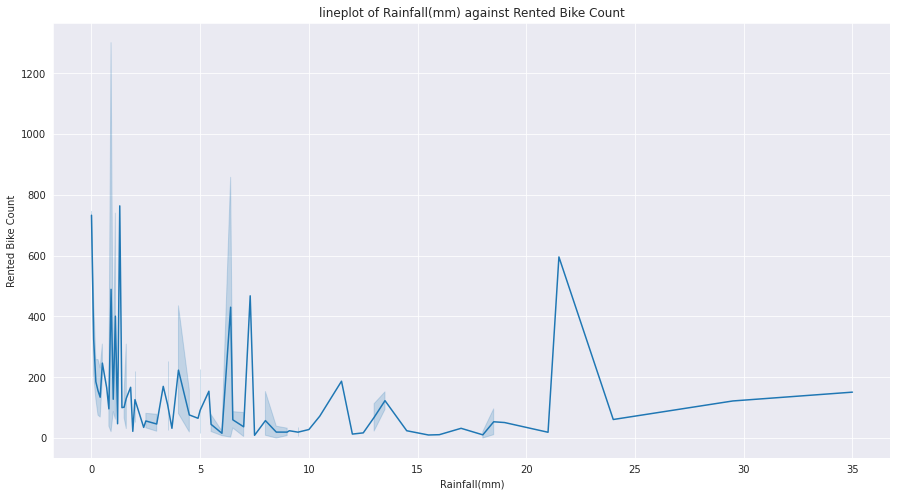

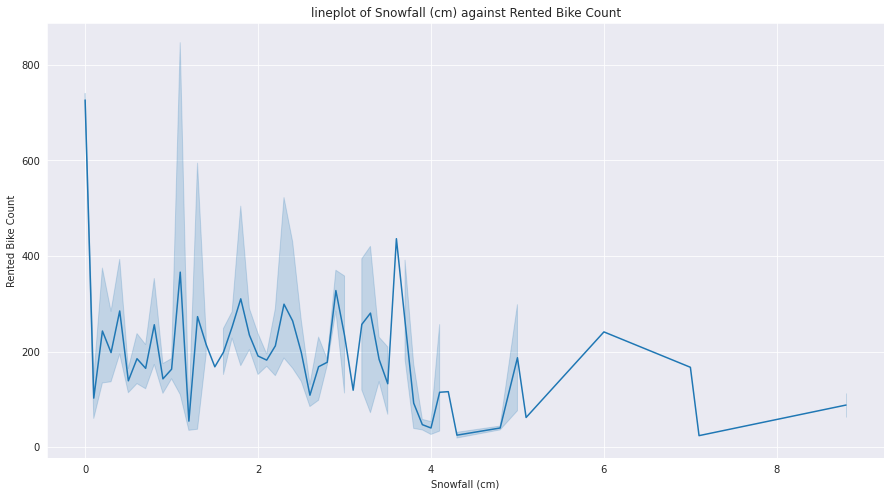

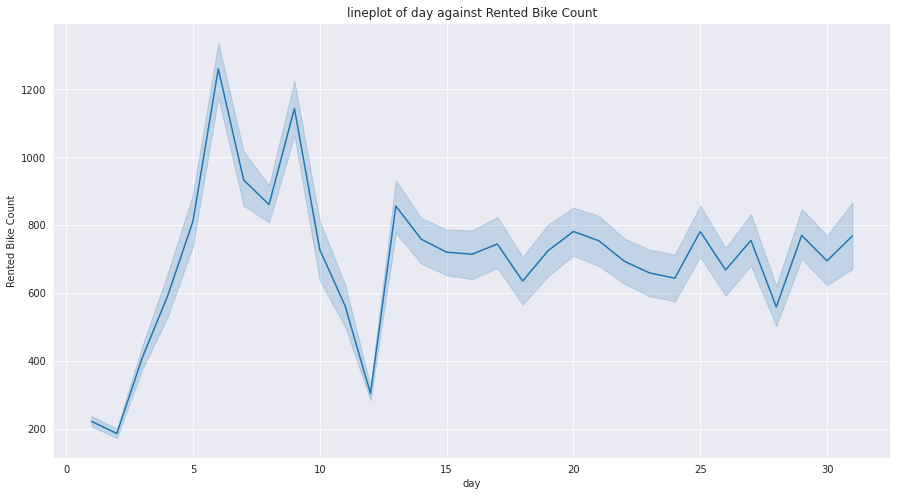

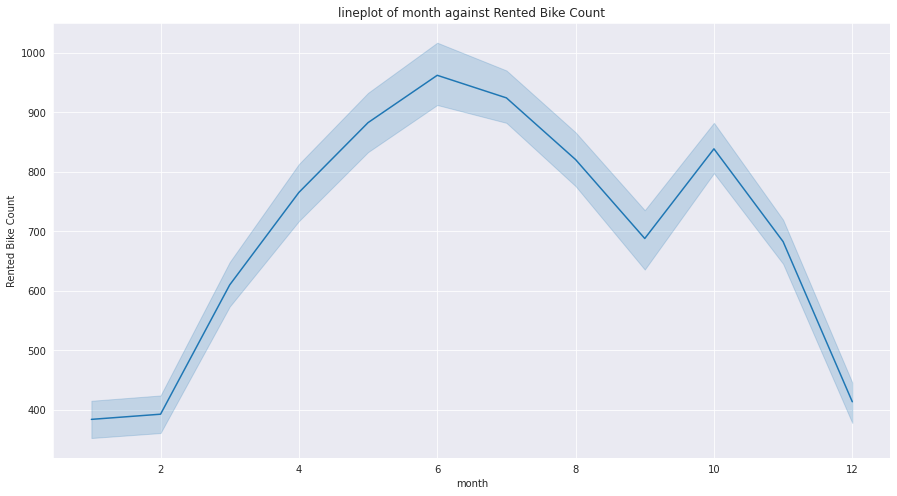

In [32]:
# Checking effect of each variable on use of rented bike
target_variables=[var for var in df.columns if var not in ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(15,8))
    ax=sns.lineplot(x=df[var], y=df["Rented Bike Count"],data=df)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

**Obsevations :**

* Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.

* When the humidity level is between 10% and 18%, people prefer to rent bikes.

* When wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.

* Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.

* According to the graph, solar radiation has no effect on customer use of rented bikes.

* When it's not raining, people prefer rental bikes the most.

* When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.

* In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.

* In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

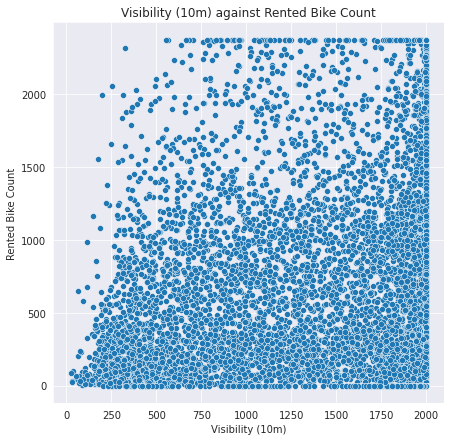

In [33]:
# Plotting graph of 'Visibility (10m)' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x="Visibility (10m)", y="Rented Bike Count",data=df)
ax.set_title('Visibility (10m) against Rented Bike Count')
plt.show()

**Observation :**

* The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.

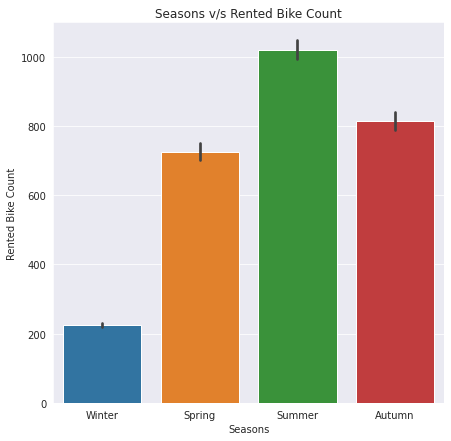

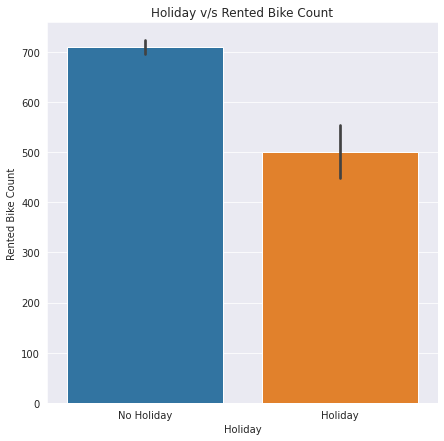

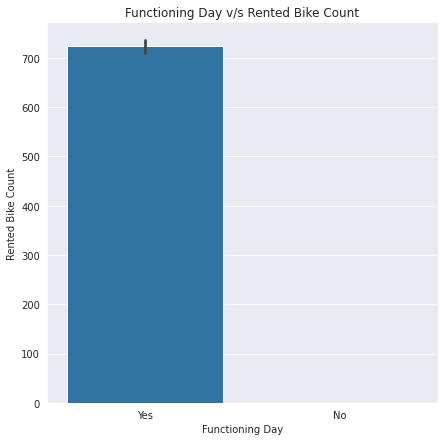

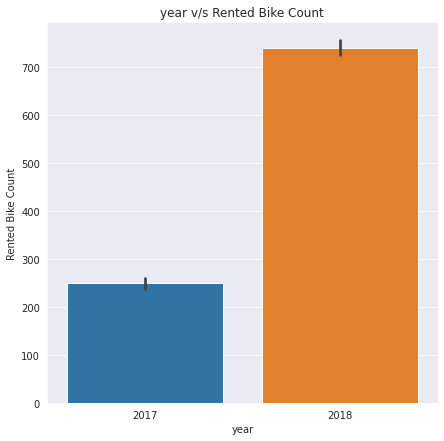

In [34]:
# Plotting bar plot for variables

# Defining target variables
target=[var for var in df.columns if var in ['Seasons', 'Holiday', 'Functioning Day', 'year']]

for var in target:
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=df[var], y='Rented Bike Count', data=df)
    ax.set_title(f'{var} v/s Rented Bike Count')
    plt.show()

**Observations :**

* During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.

* Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.

* Almost every rented bike is used during its functional hours.

* The use of rented bikes increased by three times in 2018 compared to 2017.

# **5. Data Preprocessing**

**[1] Checking Distribution of each feature and transform it to normal distribution**

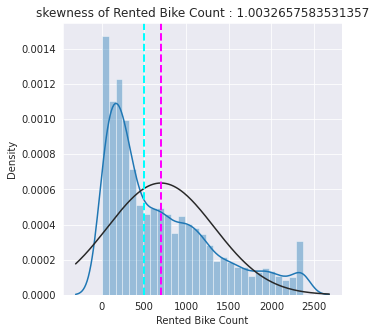

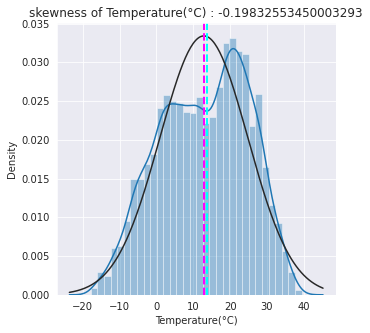

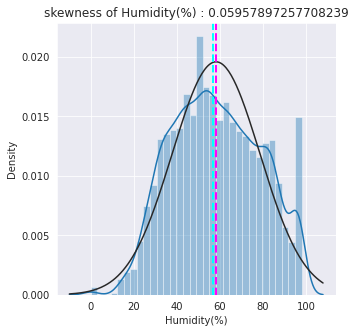

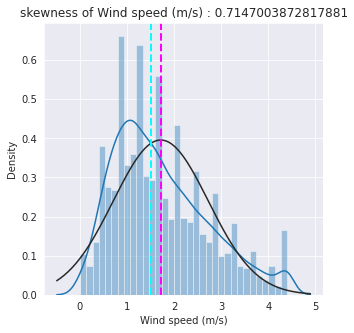

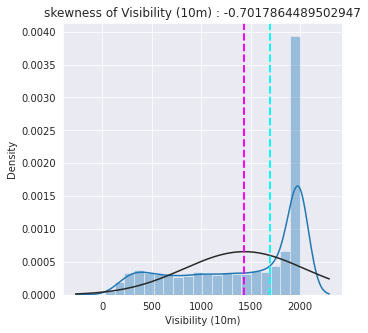

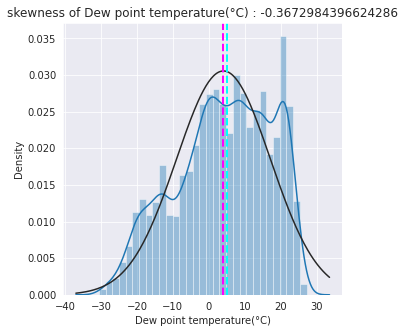

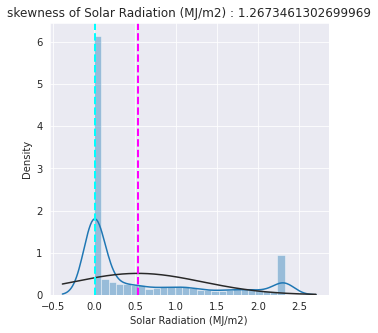

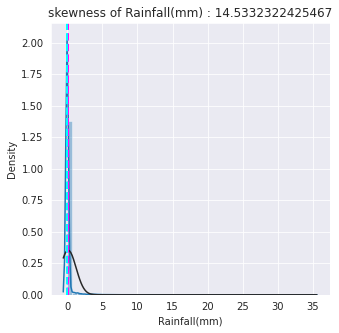

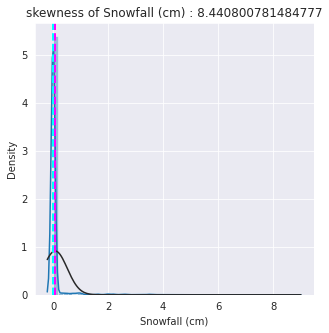

In [35]:
# Checking distribution of numerical feature
# Defining numerical contineous variables
num_variables=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Plotting distribution plot for each numerical variables
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

In [36]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["Rented Bike Count", "1.0032657583531357", 'Slightly'],
    ["Temperature(°C", "-0.19832553450003293", 'Nearly Symmetrical'],
    ["Humidity(%)", "0.05957897257708239",'Nearly Symmetrical'],
      ["Wind speed (m/s)", "0.7147003872817881",'Slightly'],
    ['Visibility (10m)','-0.7017864489502947','Slightly'],['Dew point temperature(°C)',' -0.3672984396624286', 'Nearly Symmetrical'],['Solar Radiation (MJ/m2)','1.2673461302699969', 'Slightly'],
    ['Rainfall(mm)','14.5332','Large'], ['Snowfall (cm)','8.440800781484777', 'Large']
]
 
# create header
head = ["Feature Name", "Skew", 'Skew-Type']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------------------+-----------+--------------------+
| Feature Name              |      Skew | Skew-Type          |
+===========================+===========+====================+
| Rented Bike Count         |  1.00327  | Slightly           |
+---------------------------+-----------+--------------------+
| Temperature(°C            | -0.198326 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Humidity(%)               |  0.059579 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Wind speed (m/s)          |  0.7147   | Slightly           |
+---------------------------+-----------+--------------------+
| Visibility (10m)          | -0.701786 | Slightly           |
+---------------------------+-----------+--------------------+
| Dew point temperature(°C) | -0.367298 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Solar Radiation (MJ/m2)   |  1.26735  | Slightly     

In [37]:
# Transforming distribution to normal using different transformations

# For positively skewed data
df['Rented Bike Count']=(df['Rented Bike Count']+1).transform(np.sqrt)
df['Wind speed (m/s)']=(df['Wind speed (m/s)']+1).transform(np.log)
df['Solar Radiation (MJ/m2)']=(df['Solar Radiation (MJ/m2)']+1).transform(np.log)

# For negatively skewed data
df['Visibility (10m)']=(max(df['Visibility (10m)']+1)-df['Visibility (10m)']).transform(np.sqrt)

# For large skewed data
df['Rainfall(mm)']=(df['Rainfall(mm)']+1).transform(np.log)
df['Snowfall (cm)']=(df['Snowfall (cm)']+1).transform(np.log)

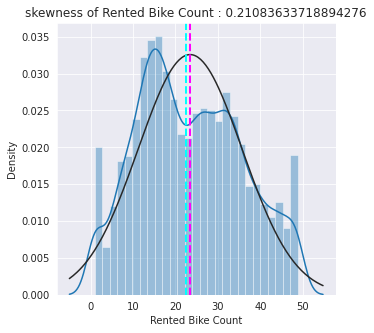

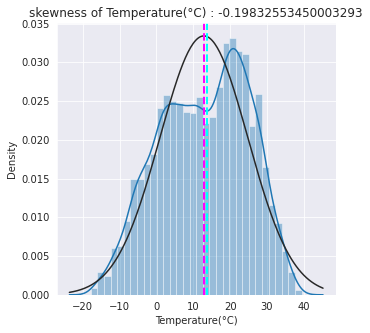

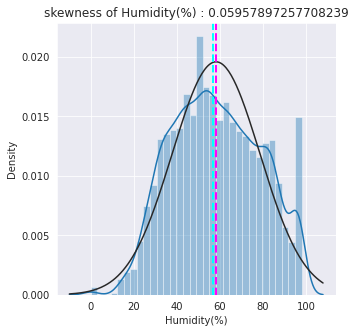

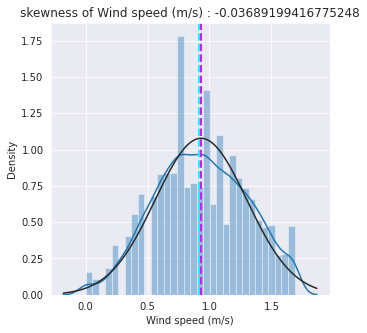

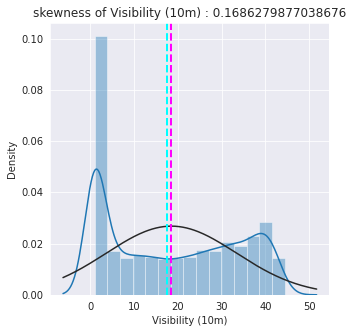

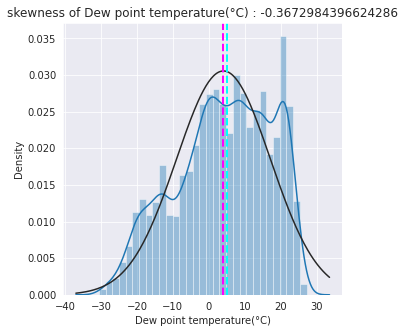

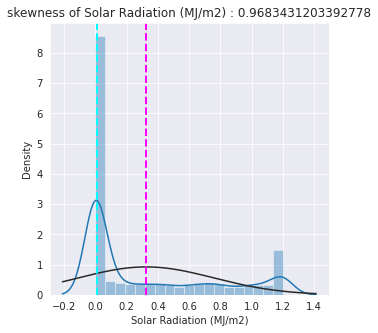

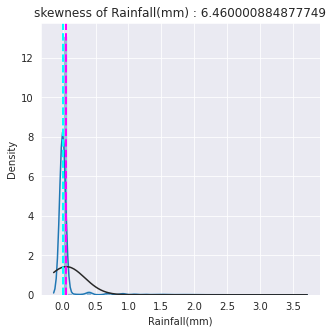

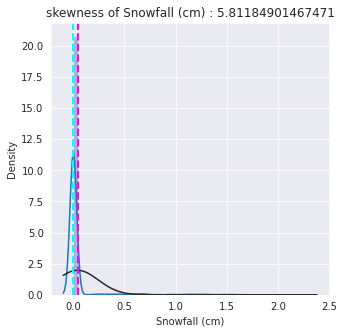

In [38]:
# Checking distribution after transformed data to normal distribution
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

By applying log transformations, we give variables a distribution that is close to being normal.

**[2] Checking relationship between independent and dependent variables is linear**

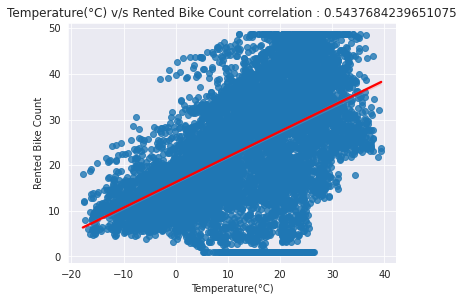

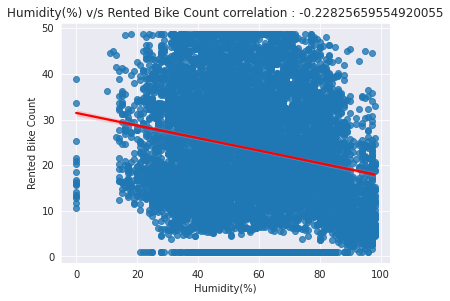

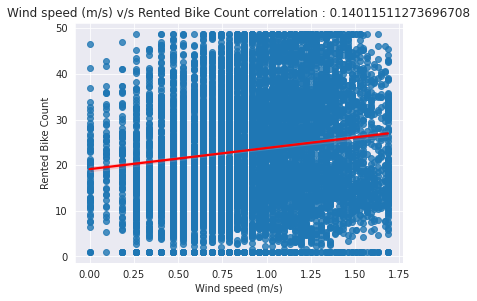

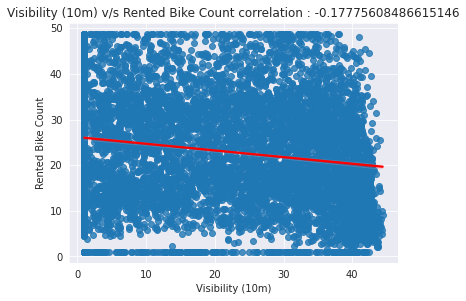

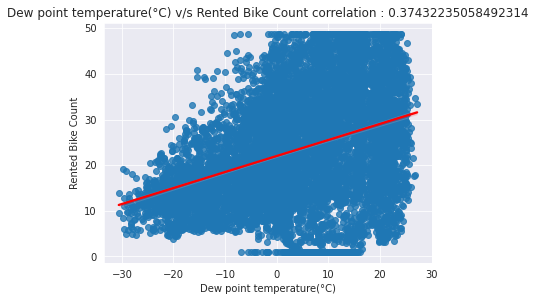

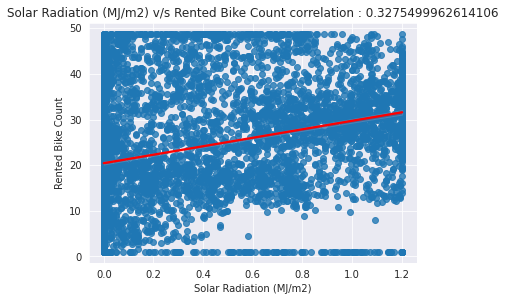

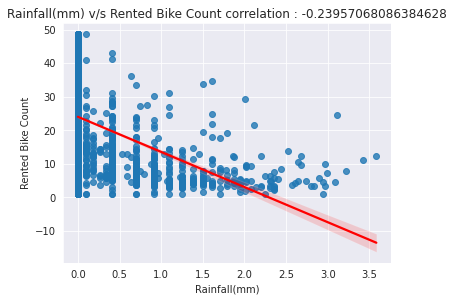

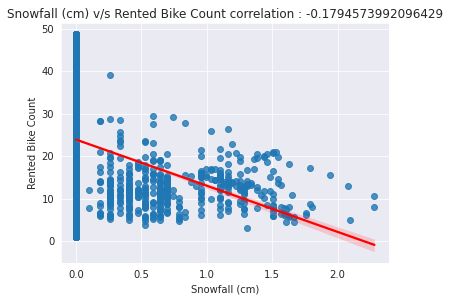

In [39]:
# Plotting regression plot 
for n, var in enumerate([var for var in num_variables if var not in ['Rented Bike Count']]):
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,n+1)
    # Finding correlation of independant variables with dependant variable
    dependant_var=df['Rented Bike Count']
    independant_var=df[var]
    correlation=independant_var.corr(dependant_var)
    ax=sns.regplot(x=df[var], y=df['Rented Bike Count'], data=df, line_kws={"color": "red"})
    ax.set_title(f'{var} v/s Rented Bike Count correlation : {correlation}')
    plt.show()

All numerical variables are correlated with the dependent variable Rented Bike Count, but Solar Radiation (MJ/m2), Dew Point Temperature (°C) and Temperature (°C) are highly correlated with the dependent variable, which is good for a linear machine learning model.

**[3] Checking multicollinearity in independant variables**

**Correlation Heatmap**

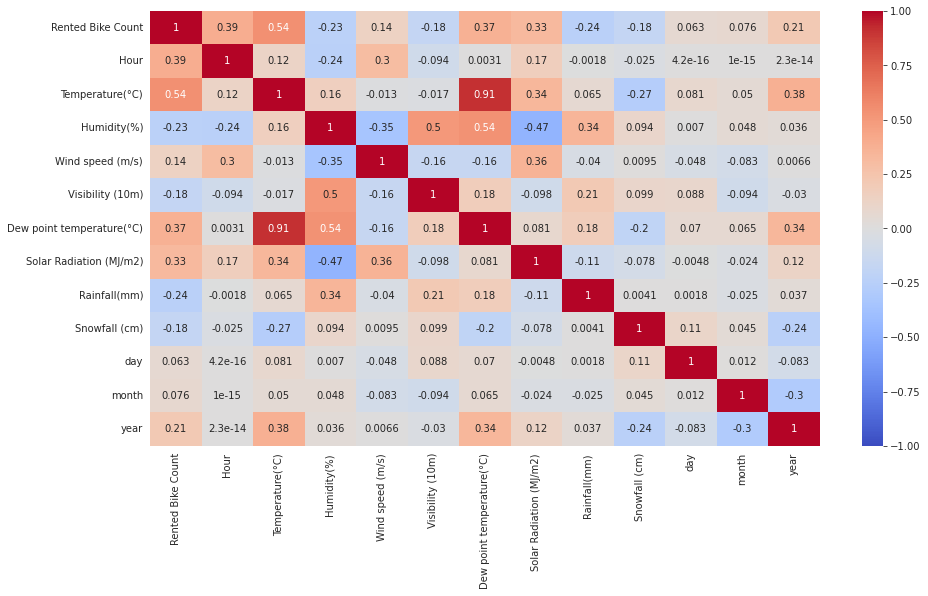

In [40]:
# Plotting a correlation heatmap for the dataset
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(correlation, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

**Observations :**

Dew point temperature (°C) and temperature (°C) have a strong correlation. A moderate correlation exists between humidity (%) and dew point temperature (°C). The variables year and Dew point temperature (°C) have a weak correlation.

**Variance inflation factor(VIF)**

In [41]:
# Variance inflation factor(VIF) to detects multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [42]:
# Calculating Variance inflation factor for dataset
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0                        Hour    4.455048
1             Temperature(°C)  187.590788
2                 Humidity(%)  188.670145
3            Wind speed (m/s)    9.666953
4            Visibility (10m)    3.894560
5   Dew point temperature(°C)  126.533084
6     Solar Radiation (MJ/m2)    3.254420
7                Rainfall(mm)    1.238572
8               Snowfall (cm)    1.198864
9                         day    4.401755
10                      month    4.742396
11                       year  371.993753

Variable year have a high variance inflation factor, so we can remove it.

In [43]:
# Dropping year feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year']]])


variables        VIF
0                        Hour   4.438523
1             Temperature(°C)  26.138761
2                 Humidity(%)  13.411031
3            Wind speed (m/s)   9.519361
4            Visibility (10m)   3.873580
5   Dew point temperature(°C)  13.302493
6     Solar Radiation (MJ/m2)   3.232551
7                Rainfall(mm)   1.173579
8               Snowfall (cm)   1.186388
9                         day   4.363200
10                      month   4.677982

Variable Temperature(°C), Humidity(%) and Dew point temperature(°C) have a high variance inflation factor, so we can remove Dew point temperature(°C) variable to reduce VIF.

In [44]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)']]])


variables        VIF
0                     Hour   4.078444
1          Temperature(°C)   3.457003
2              Humidity(%)  12.542367
3         Wind speed (m/s)   7.525551
4         Visibility (10m)   3.832421
5  Solar Radiation (MJ/m2)   2.811538
6             Rainfall(mm)   1.149039
7            Snowfall (cm)   1.173295
8                      day   3.879087
9                    month   4.328055

Variable 'Humidity(%)' have a high variance inflation factor, so we can remove it.


In [45]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)', 'Humidity(%)']]])


variables       VIF
0                     Hour  4.072834
1          Temperature(°C)  2.693503
2         Wind speed (m/s)  6.246470
3         Visibility (10m)  2.375806
4  Solar Radiation (MJ/m2)  2.104801
5             Rainfall(mm)  1.113715
6            Snowfall (cm)  1.155757
7                      day  3.762873
8                    month  3.578675

From above, variables year,Dew point temperature(°C), and Humidity(%) have a high variance inflation factor, so we can remove them.


In [46]:
# Drop high VIF variables from dataset
df.drop(columns=['year','Dew point temperature(°C)', 'Humidity(%)'], axis=1,inplace=True)


In [47]:
# Checking dataset
df.head()


Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0          15.968719     0             -5.2          1.163151   
1          14.317821     1             -5.5          0.587787   
2          13.190906     2             -6.0          0.693147   
3          10.392305     3             -6.2          0.641854   
4           8.888194     4             -6.0          1.193922   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0               1.0                      0.0           0.0            0.0   
1               1.0                      0.0           0.0            0.0   
2               1.0                      0.0           0.0            0.0   
3               1.0                      0.0           0.0            0.0   
4               1.0                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  day  month  
0  Winter  No Holiday             Yes   12      1  
1  Winter  No Holiday             Yes   12      1  
2  Winter  No Holiday             Yes   12      1  
3  Winter  No Holiday             Yes   12      1  
4  Winter  No Holiday             Yes   12      1

## **[4] Features encoding**


In [48]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
categorical_variables

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [49]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('--'*50)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
----------------------------------------------------------------------------------------------------
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    8465
No      295
Name: Functioning Day, dtype: int64
----------------------------------------------------------------------------------------------------


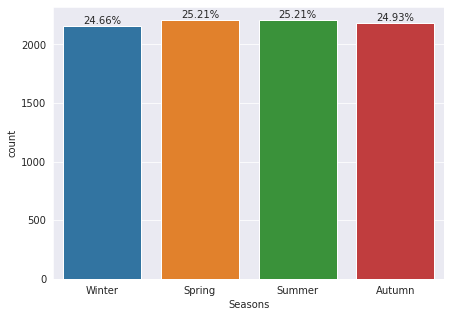

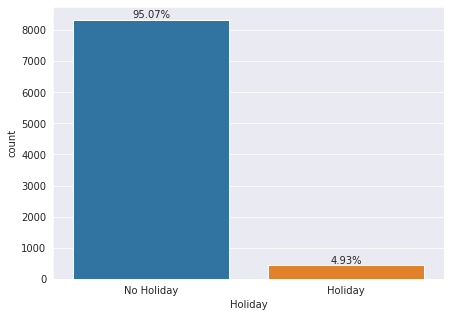

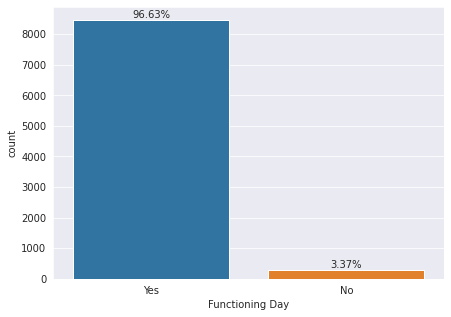

In [50]:
# Plotting count plot for each categories in categorical_variables
for var in categorical_variables:
    plt.figure(figsize=(7,5))
    plot=plt.subplot(111)
    ax=sns.countplot(x=df[var])
    annot_percent(plot)
    plt.show()

Because categorical variables have a limited number of categories, label encoding can be used instead of one-hot encoding. One hot encoding is used when there are quite large categories in categorical variables.

In [51]:
# Encoding categorical_variables using label encoding
# Mapping the categorical variables
df['Seasons'] = df['Seasons'].map({'Spring':1,'Summer':2,'Autumn':3,'Winter':4})
df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1,'No':0})

In [52]:
# Checking basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   float64
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Seasons                  8760 non-null   int64  
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  day                      8760 non-null   int64  
 12  month                    8760 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 889.8 KB


In [53]:
# Final Dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0          15.968719     0             -5.2          1.163151   
1          14.317821     1             -5.5          0.587787   
2          13.190906     2             -6.0          0.693147   
3          10.392305     3             -6.2          0.641854   
4           8.888194     4             -6.0          1.193922   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0               1.0                      0.0           0.0            0.0   
1               1.0                      0.0           0.0            0.0   
2               1.0                      0.0           0.0            0.0   
3               1.0                      0.0           0.0            0.0   
4               1.0                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  day  month  
0        4        0                1   12      1  
1        4        0                1   12      1  
2        4        0                1   12      1  
3        4        0                1   12      1  
4        4        0                1   12      1

This is the final dataset we will use to build a machine learning model.

## **[5] Data Splitting**

In [54]:
# Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Rented Bike Count'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].values
# Create the data of dependent variable
y = df[dependent_variable].values

In [55]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (7008, 12)
Shape of X_test : (1752, 12)
Shape of y_train : (7008,)
Shape of y_test : (1752,)


We divided the dataset into 20% for model testing and 80% for training.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).


In [57]:
# Checking values of splitted dataset
X_train[0:5]

array([[ 3.        ,  0.        ,  1.58923521, 35.80502758,  0.70803579,
        13.2       ,  0.        ,  1.        , 15.        , 16.        ,
         0.        , 11.        ],
       [ 2.        ,  0.        ,  0.99325177, 38.249183  ,  0.56531381,
        22.9       ,  0.        ,  1.        ,  9.        , 29.        ,
         0.        ,  6.        ],
       [ 3.        ,  0.        ,  0.87546874, 33.64520768,  0.        ,
        11.2       ,  0.        ,  1.        , 19.        , 15.        ,
         0.        , 11.        ],
       [ 4.        ,  0.        ,  1.09861229, 23.8117618 ,  0.        ,
        -2.6       ,  0.        ,  1.        , 23.        ,  2.        ,
         0.        ,  2.        ],
       [ 2.        ,  0.        ,  0.91629073, 31.55946768,  0.        ,
        27.2       ,  0.        ,  1.        , 22.        , 18.        ,
         0.        ,  7.        ]])

In [58]:
# Checking values of splitted dataset
X_test[0:5]

array([[ 2.        ,  0.        ,  1.02961942,  1.41421356,  0.53062825,
        27.2       ,  0.        ,  1.        ,  8.        ,  8.        ,
         0.        , 10.        ],
       [ 2.        ,  0.        ,  1.13140211, 34.6554469 ,  1.20146967,
        32.6       ,  0.        ,  1.        , 12.        , 20.        ,
         0.        ,  7.        ],
       [ 2.        ,  0.        ,  0.78845736, 16.03121954,  0.98581679,
        34.        ,  0.        ,  1.        , 14.        ,  8.        ,
         0.        ,  7.        ],
       [ 3.        ,  0.        ,  0.87546874, 19.07878403,  0.10436002,
        16.9       ,  0.        ,  1.        , 18.        , 16.        ,
         0.        , 10.        ],
       [ 1.        ,  0.        ,  0.69314718, 24.55605832,  0.17395331,
         6.4       ,  0.        ,  1.        ,  7.        , 18.        ,
         0.        ,  4.        ]])

## **[6] Data Scaling**

In [59]:
#Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [60]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.66666667, 0.        , 0.94238389, 0.80265925, 0.58930809,
        0.54195804, 0.        , 1.        , 0.65217391, 0.5       ,
        0.        , 0.90909091],
       [0.33333333, 0.        , 0.58897793, 0.85902536, 0.47051858,
        0.71153846, 0.        , 1.        , 0.39130435, 0.93333333,
        0.        , 0.45454545],
       [0.66666667, 0.        , 0.51913501, 0.75285037, 0.        ,
        0.50699301, 0.        , 1.        , 0.82608696, 0.46666667,
        0.        , 0.90909091],
       [1.        , 0.        , 0.65145456, 0.52607548, 0.        ,
        0.26573427, 0.        , 1.        , 1.        , 0.03333333,
        0.        , 0.09090909],
       [0.33333333, 0.        , 0.54334162, 0.70474989, 0.        ,
        0.78671329, 0.        , 1.        , 0.95652174, 0.56666667,
        0.        , 0.54545455]])

In [61]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.33333333, 0.        , 0.6105432 , 0.00955242, 0.44164931,
        0.78671329, 0.        , 1.        , 0.34782609, 0.23333333,
        0.        , 0.81818182],
       [0.33333333, 0.        , 0.67089825, 0.77614809, 1.        ,
        0.88111888, 0.        , 1.        , 0.52173913, 0.63333333,
        0.        , 0.54545455],
       [0.33333333, 0.        , 0.46753905, 0.34664381, 0.82050909,
        0.90559441, 0.        , 1.        , 0.60869565, 0.23333333,
        0.        , 0.54545455],
       [0.66666667, 0.        , 0.51913501, 0.41692549, 0.0868603 ,
        0.60664336, 0.        , 1.        , 0.7826087 , 0.5       ,
        0.        , 0.81818182],
       [0.        , 0.        , 0.41102207, 0.54324014, 0.14478377,
        0.42307692, 0.        , 1.        , 0.30434783, 0.56666667,
        0.        , 0.27272727]])

# **ML Model Implementation**

In [62]:
# Definig function for evaluating model

# Importing necessary librery
from sklearn import metrics
#Evaluate Metrics
def evaluate_model(true, predicted):  
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('Mean squared error (MSE):', mse)
    print('Root mean squared error (RMSE):', rmse)
    print('Mean absolute error (MAE):', mae)
    print('R2 Square', r2_square)
    print('____________________________________')

### **[1] Linear Regression**

**train_test_split**

In [63]:
# Fitting Regression model to training set
from sklearn.linear_model import LinearRegression
lin_reg_tts = LinearRegression()
lin_reg_tts.fit(X_train, y_train)

LinearRegression()

In [64]:
# Score of the model
lin_reg_tts_score=lin_reg_tts.score(X_train, y_train)
print(f'Score of the model : {lin_reg_tts_score}')

Score of the model : 0.6395792892371408


In [66]:
# Intercept
lin_reg_tts.intercept_

-21.27167190090246

In [67]:
# Coefficients
lin_reg_tts.coef_

array([ -2.18209128,  -3.22830156,   0.1281394 ,  -3.34365943,
         2.4926218 ,  26.79663453, -38.99734556,  25.26786083,
        12.88441975,   1.1678821 ,  -5.11490368,   2.8318968 ])

In [68]:
# Predicting results for train and test set
y_train_pred_tts=lin_reg_tts.predict(X_train)
y_test_pred_tts=lin_reg_tts.predict(X_test)

In [69]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.139716745066536
Root mean squared error (RMSE): 7.357969607511745
Mean absolute error (MAE): 5.756414898386549
R2 Square 0.6395792892371408
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.11071888143365
Root mean squared error (RMSE): 7.49070883704831
Mean absolute error (MAE): 5.790575510361676
R2 Square 0.6231292158906648
____________________________________


In [70]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.6389609835146026
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205286124350512


In [71]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1847189380361226


Note :- Mean of Residuals is very very close to zero, so all good here.

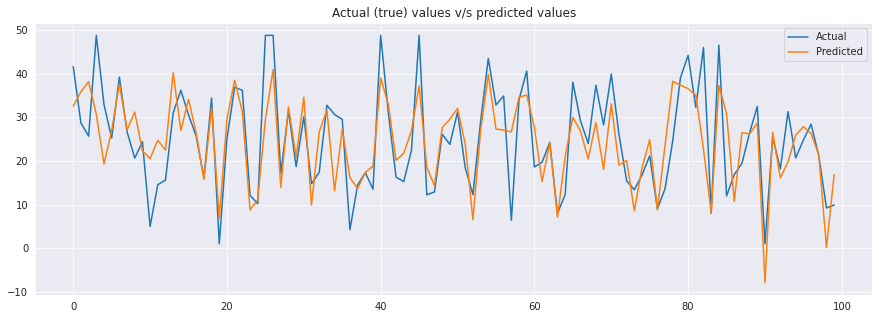

In [72]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

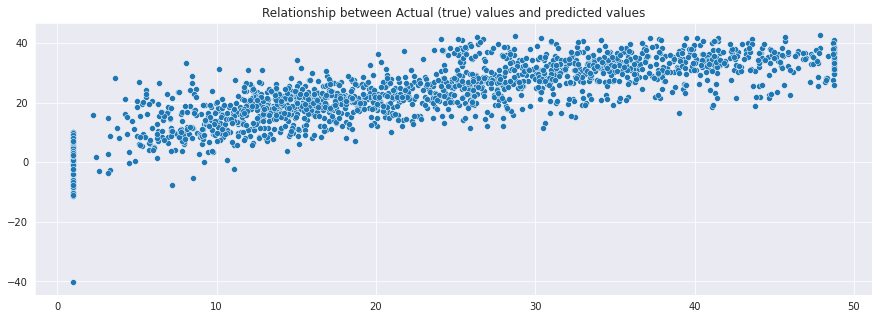

In [73]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

* We get the conclusion that the linear model fails to perform well based on the above model score and graph.

* Model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

### **[2] Lasso Regression (L1)**

Cross Validation and hyperparameter tuning

In [74]:
# Fitting lasso regression model to training set
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001 , max_iter= 3000, random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_reg = GridSearchCV(lasso, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train, y_train)


Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000, random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

Fitting 5 folds for each of 21 candidates, totalling 105 fits

In [75]:
# Best estimators
lasso_reg_best_est=lasso_reg.best_estimator_
print(f'The best estimator values : {lasso_reg_best_est}')

The best estimator values : Lasso(alpha=0.0014, max_iter=3000, random_state=0)


In [76]:
# best fit alpha value
lasso_reg_best_params=lasso_reg.best_params_
print(f'The best fit alpha value : {lasso_reg_best_params}')

The best fit alpha value : {'alpha': 0.0014}


In [77]:
# Mean cross-validated score of the best_estimator of model
lasso_reg_score=lasso_reg.best_score_
print(f" The negative mean squared error is: {lasso_reg_score}")

 The negative mean squared error is: -54.4235602725517


In [78]:
# Predicting results for train and test set
y_train_pred=lasso_reg.predict(X_train)
y_test_pred=lasso_reg.predict(X_test)

In [79]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.140535142129835
Root mean squared error (RMSE): 7.358025220270031
Mean absolute error (MAE): 5.757349532517941
R2 Square 0.6395738409771761
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10154900581331
Root mean squared error (RMSE): 7.4900967287354385
Mean absolute error (MAE): 5.790607101095111
R2 Square 0.6231908058735436
____________________________________


In [80]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.6389555259080877
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.620590627420687


In [81]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1849613448793442


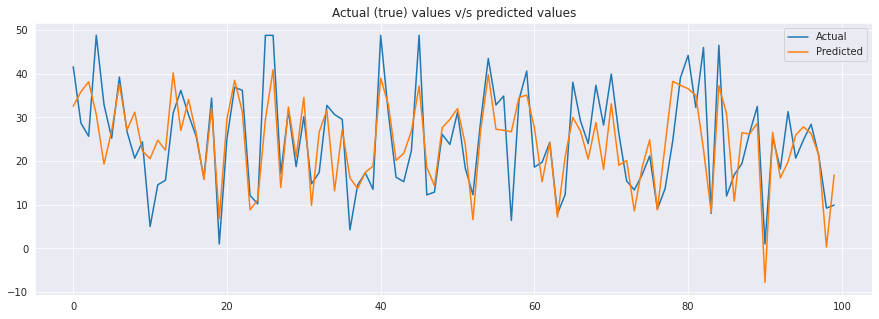

In [82]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

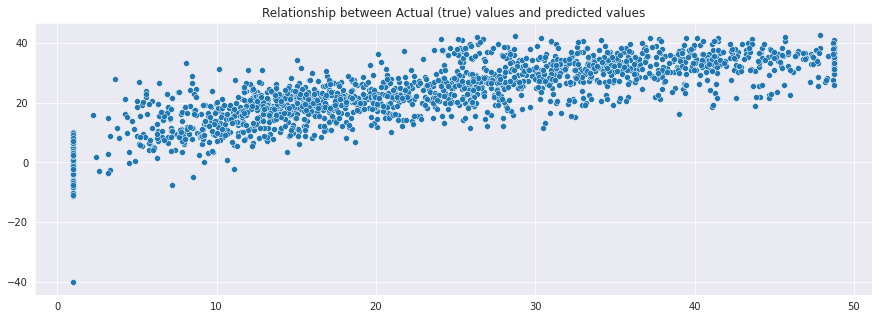

In [83]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

* The Lasso (L1) regression model gave the same performance as the above linear regression model.

* The relationship between actual and predicted values suggests that the model has been slightly improved.

* The model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.


### **[3] Ridge Regression (L2)**

Cross Validation and hyperparameter tuning

In [84]:
# Fitting ridge regression model to training set
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_reg = GridSearchCV(ridge, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [85]:
# Best estimators
ridge_reg_best_est=ridge_reg.best_estimator_
print(f'The best estimator values : {ridge_reg_best_est}')

The best estimator values : Ridge(alpha=1, random_state=0)


In [86]:
# best fit alpha value
ridge_reg_best_params=ridge_reg.best_params_
print(f'The best fit alpha value : {ridge_reg_best_params}')

The best fit alpha value : {'alpha': 1}


In [87]:
# Mean cross-validated score of the best_estimator of model
ridge_reg_score=ridge_reg.best_score_
print(f" The negative mean squared error is: {ridge_reg_score}")

 The negative mean squared error is: -54.42323488197028


In [88]:
# Predicting results for train and test set
y_train_pred=ridge_reg.predict(X_train)
y_test_pred=ridge_reg.predict(X_test)

In [89]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14632366768978
Root mean squared error (RMSE): 7.358418557522382
Mean absolute error (MAE): 5.758731749316345
R2 Square 0.6395353054136007
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10812145962038
Root mean squared error (RMSE): 7.490535458805357
Mean absolute error (MAE): 5.7911723001693804
R2 Square 0.6231466616196617
____________________________________


In [90]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.638916924236326
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.620546178548607


In [91]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1847062430741327


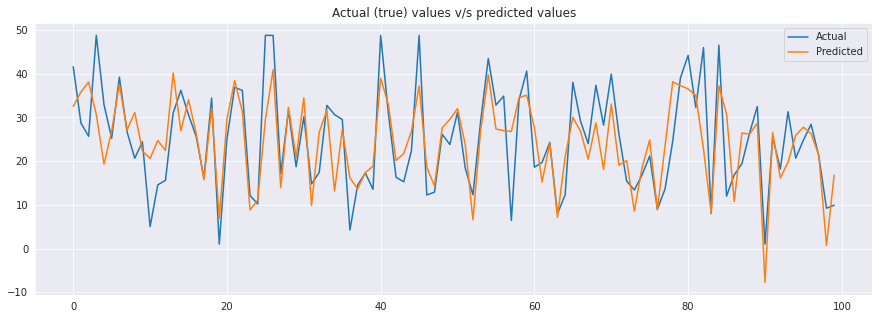

In [92]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

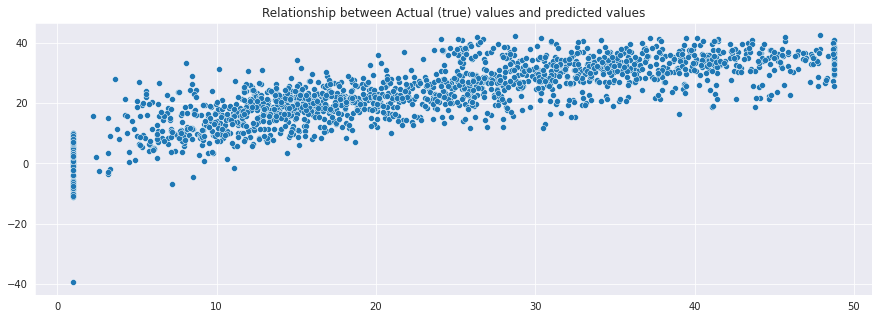

In [93]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

* The Ridge (L2) regression model gave the same performance as the above linear and lasso regression models.

* The relationship between actual and predicted values suggests that the model has been slightly improved.

* The model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

### **[4] ElasticNet Regression**

Cross Validation and hyperparameter tuning

In [94]:
# Fitting elasticnet regression model to training set
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
enet_reg = GridSearchCV(elasticnet, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
enet_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [95]:
# Best estimators
enet_reg_best_est=enet_reg.best_estimator_
print(f'The best estimator values : {enet_reg_best_est}')

The best estimator values : ElasticNet(alpha=0.0001, random_state=0)


In [96]:
# best fit alpha value
enet_reg_best_params=enet_reg.best_params_
print(f'The best fit alpha value : {enet_reg_best_params}')

The best fit alpha value : {'alpha': 0.0001}


In [97]:
# Mean cross-validated score of the best_estimator of model
enet_reg_score=enet_reg.best_score_
print(f" The negative mean squared error is: {enet_reg_score}")

 The negative mean squared error is: -54.42384418198187


In [98]:
# Predicting results for train and test set
y_train_pred=enet_reg.predict(X_train)
y_test_pred=enet_reg.predict(X_test)

In [99]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14059734645564
Root mean squared error (RMSE): 7.358029447240317
Mean absolute error (MAE): 5.7571310954294255
R2 Square 0.6395734268684835
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10782877799367
Root mean squared error (RMSE): 7.490515922017233
Mean absolute error (MAE): 5.79069244396787
R2 Square 0.6231486274321901
____________________________________


In [100]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.6389551110889871
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205481579262593


In [101]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1847218524091808


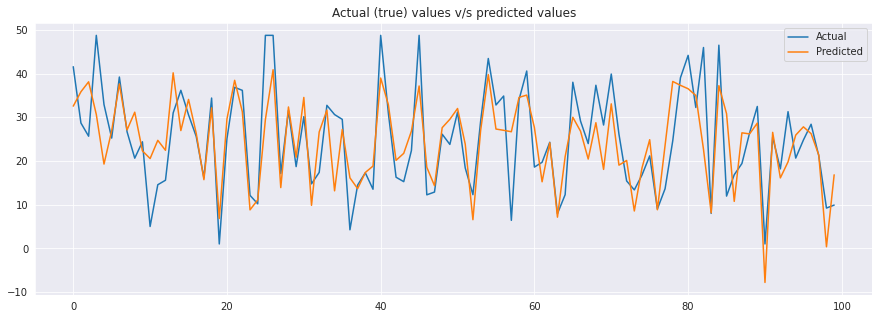

In [102]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

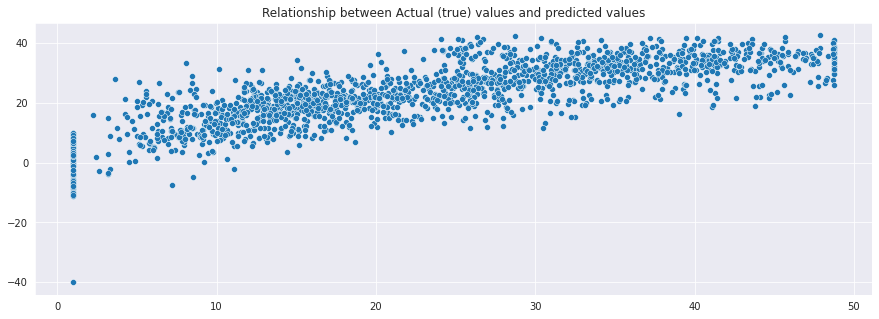

In [103]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

* The Ridge (L2) regression model gave the same performance as the above linear and lasso regression models.

* The relationship between actual and predicted values looks more linear, suggesting that the model has been slightly improved.

* The model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

### **[5] Decision Tree**

train_test_spilt

In [104]:
# Fitting Decision tree Regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree_tts=DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
dtree_tts.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [105]:
# Score of the model
dtree_tts_score=dtree_tts.score(X_train, y_train)
print(f'Score of the model : {dtree_tts_score}')

Score of the model : 0.7217408060761781


In [106]:
# Predicting results for train and test set
y_train_pred_tts=dtree_tts.predict(X_train)
y_test_pred_tts=dtree_tts.predict(X_test)

In [107]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 41.798025171362255
Root mean squared error (RMSE): 6.465139222890893
Mean absolute error (MAE): 4.880238891112918
R2 Square 0.7217408060761781
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 42.74620140910454
Root mean squared error (RMSE): 6.538057923351899
Mean absolute error (MAE): 4.916573458097296
R2 Square 0.7128927455592566
____________________________________


In [108]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.7212634493460729
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7109115569144671


In [109]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.24736901866193003


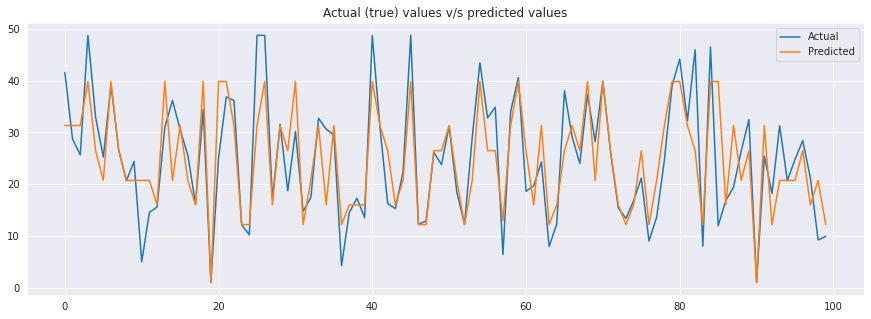

In [110]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

Model Decision Tree using train test split performs well based on the above model score and graph.

Cross Validation

In [111]:
# Fitting Decision tree regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
param_dict = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
dtree_reg = GridSearchCV(dtree, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
dtree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

In [112]:
# Best estimators
dtree_reg_best_est=dtree_reg.best_estimator_
print(f'The best estimator values : {dtree_reg_best_est}')

The best estimator values : DecisionTreeRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=0)


In [113]:
# best fit values
dtree_reg_best_params=dtree_reg.best_params_
print(f'The best fit values: {dtree_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [114]:
# Mean cross-validated score of the best_estimator of model
dtree_reg_score=dtree_reg.best_score_
print(f" The negative mean squared error is: {dtree_reg_score}")

 The negative mean squared error is: -32.76097945522946


In [115]:
# Predicting results for train and test set
y_train_pred=dtree_reg.predict(X_train)
y_test_pred=dtree_reg.predict(X_test)

In [116]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 26.080840871041286
Root mean squared error (RMSE): 5.106940460886664
Mean absolute error (MAE): 3.560022969856133
R2 Square 0.8263737646006375
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 31.479085070816268
Root mean squared error (RMSE): 5.610622520791812
Mean absolute error (MAE): 3.8559972273699206
R2 Square 0.7885689631111018
____________________________________


In [117]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.8260759068701454
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7871099795328


In [118]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.20737793020927525


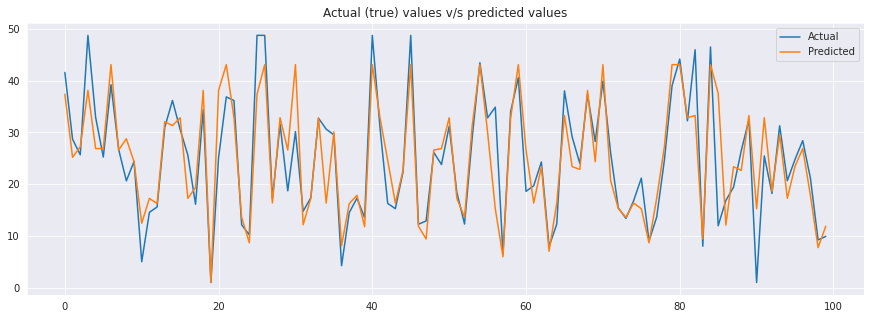

In [119]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

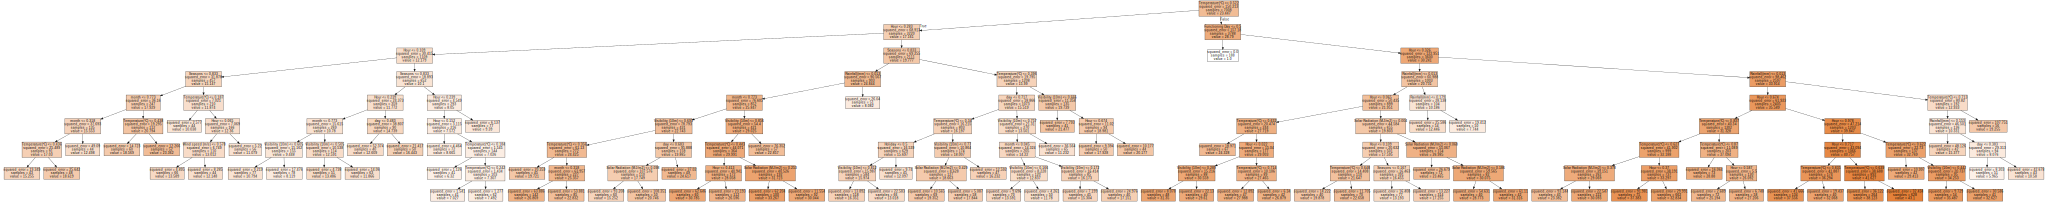

In [120]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dtree_reg.best_estimator_, out_file=None
   , feature_names=df[independent_variables].columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

* The decision tree regression model is well trained than other Linear regression, Lasso, Ridge, and ElasticNet regression models.

* Cross validation and hyperparameter tuning improved the decision tree model's performance and reduced error more than train_test_split.

* A model decision tree using GridSearchCV performs well based on the above model score and graph.

### **[6] Random Forest**

train_test_split

In [121]:
# Fitting Random Forest Regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_tts=RandomForestRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
rf_tts.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=0)

In [122]:
# Score of the model
rf_tts_score=rf_tts.score(X_train, y_train)
print(f'Score of the model : {rf_tts_score}')

Score of the model : 0.7537562647066289


In [123]:
# Predicting results for train and test set
y_train_pred_tts=rf_tts.predict(X_train)
y_test_pred_tts=rf_tts.predict(X_test)

In [124]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 36.98890125046624
Root mean squared error (RMSE): 6.0818501502804425
Mean absolute error (MAE): 4.654473147039143
R2 Square 0.7537562647066289
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 38.16115283895534
Root mean squared error (RMSE): 6.1774713952357025
Mean absolute error (MAE): 4.740794064936303
R2 Square 0.7436884809242383
____________________________________


In [125]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.7533338308505145
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7419197987914556


In [126]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.24717816187714672


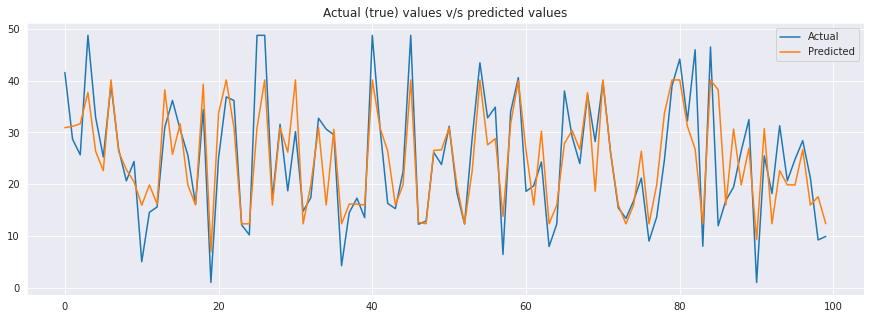

In [127]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

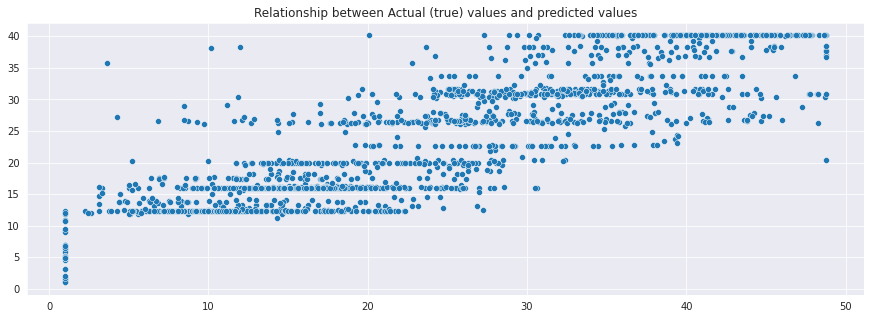

In [128]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

Using train_test_split, we achieved the highest model accuracy compared to the all above models.

Cross Validation

In [129]:
# Fitting Random Forest regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_cv = RandomForestRegressor(random_state=42)
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
rf_reg = GridSearchCV(rf_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [130]:
# Best estimators
rf_reg_best_est=rf_reg.best_estimator_
print(f'The best estimator values : {rf_reg_best_est}')

The best estimator values : RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=42)


In [131]:
# best fit values
rf_reg_best_params=rf_reg.best_params_
print(f'The best fit values: {rf_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [132]:
# Mean cross-validated score of the best_estimator of model
rf_reg_score=rf_reg.best_score_
print(f" The negative mean squared error is: {rf_reg_score}")

 The negative mean squared error is: -26.457818782361677


In [133]:
# Predicting results for train and test set
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)

In [134]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)


Training set evaluation result
____________________________________
Mean squared error (MSE): 23.30591767895643
Root mean squared error (RMSE): 4.827620291505581
Mean absolute error (MAE): 3.4399831656884814
R2 Square 0.8448470749416028
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 26.070947615504036
Root mean squared error (RMSE): 5.105971760155361
Mean absolute error (MAE): 3.622332897983568
R2 Square 0.8248930210448702
____________________________________


In [135]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.8445809083796728
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.8236846922654213


In [136]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.22434866607859286


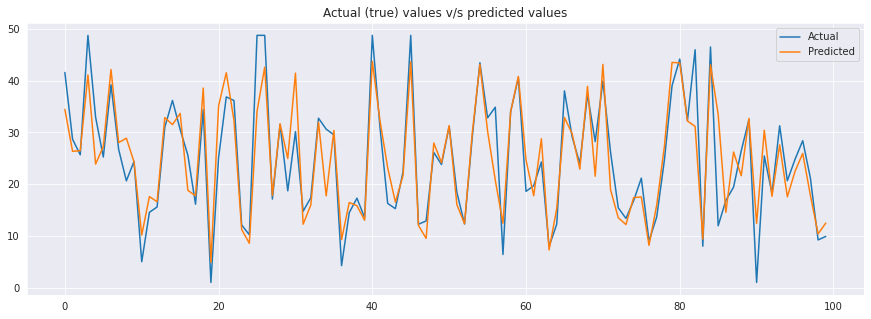

In [137]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

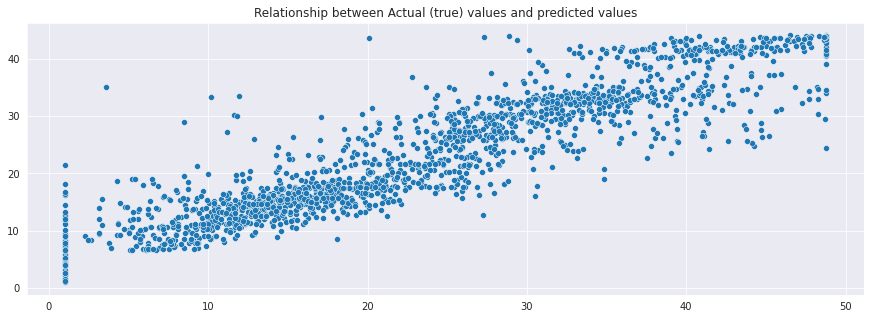

In [138]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

* The Random Forest regression model is well trained than other Linear regression, Lasso, Ridge, ElasticNet, and Decision tree regression models.

* Cross validation and hyperparameter tuning improved the Random Forest regression model's performance and reduced error more than train_test_split.

* A model Random Forest regression using GridSearchCV performs well based on the above model score and graph.


### **[7] XGBoost**

Cross Validation

In [139]:
# Fitting XGBoost regression model to training set
import xgboost as xgb
xgb_cv = xgb.XGBRegressor(random_state=0)

param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
xgb_reg = GridSearchCV(xgb_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=3)
xgb_reg.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[10:40:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[10:40:24] WARNING

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [140]:
# Best estimators
xgb_reg_best_est=xgb_reg.best_estimator_
print(f'The best estimator values : {xgb_reg_best_est}')

The best estimator values : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [141]:
# best fit values
xgb_reg_best_params=xgb_reg.best_params_
print(f'The best fit values: {xgb_reg_best_params}')

The best fit values: {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [142]:
# Mean cross-validated score of the best_estimator of model
xgb_reg_score=xgb_reg.best_score_
print(f" The negative mean squared error is: {xgb_reg_score}")

 The negative mean squared error is: -16.405654814063897


In [143]:
# Predicting results for train and test set
y_train_pred=xgb_reg.predict(X_train)
y_test_pred=xgb_reg.predict(X_test)

In [144]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 3.6136906983409802
Root mean squared error (RMSE): 1.9009709882954502
Mean absolute error (MAE): 1.309914356532506
R2 Square 0.9759428189085996
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 15.078788236808556
Root mean squared error (RMSE): 3.8831415422063302
Mean absolute error (MAE): 2.55266924258066
R2 Square 0.8987224747871656
____________________________________


In [145]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


Train set evaluation result
____________________________________
Adjusted R2 :  0.9759015485478996
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.8980236074481466


In [146]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.07014912885855548


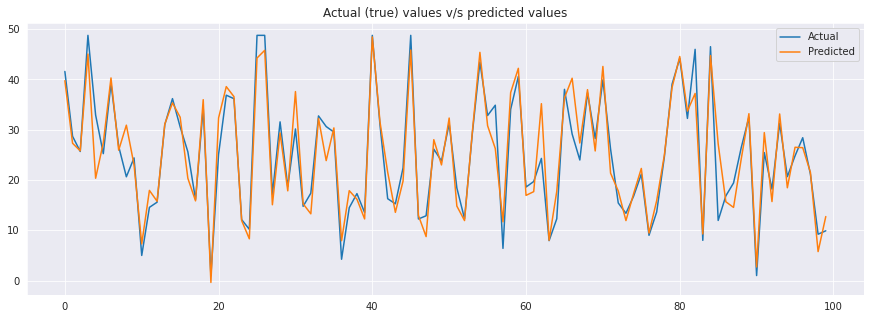

In [147]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

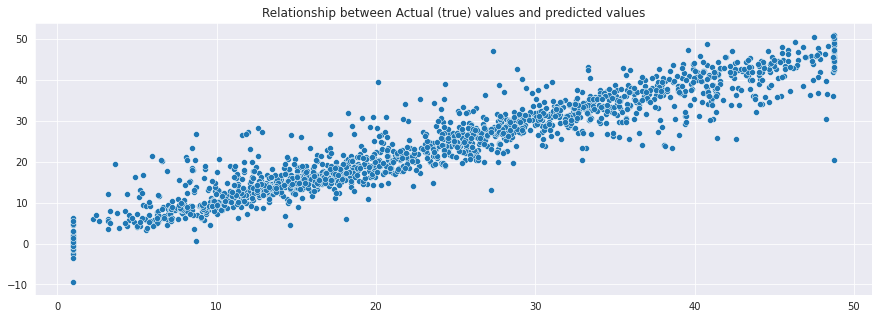

In [148]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

* We got the highest model performance accuracy and lowest mean of residuals using XGBoost compared to all the above Linear regression, Lasso, Ridge, ElasticNet, and Decision tree regression models.

* Cross validation and hyperparameter tuning improved the Random Forest regression model's performance and reduced error more than train_test_split.

* A model XGBoost regression using GridSearchCV performs well based on the above model score and graph.

* Mean of residuals are very very close to zero, means model well fitted and trained.

## **7. Model Evaluation**

## **Comparing Different Models based on the Evaluation Metrics**


In [149]:
# import module
from tabulate import tabulate
 
# Assign data
mydata = [
    ['Linear regression',"56.11071", "7.49070", '5.79057','0.623129','0.6205286','0.184718'],
    ['Lasso (L1)',"56.1015", "7.490094", '5.7906075','0.62319105','0.62059087','0.184956'],
    ['Ridge (L2)',"56.108121", "7.4905354", '5.791172','0.623146','0.6205401','0.184706'],
    ['ElasticNet',"56.1078", "7.49051", '5.79069','0.623148','0.620548','0.184721'],
    ['Decision Tree','31.4790',"5.61062", '3.8559','0.788568','0.787109','0.207377'],
    ['Random Forest',"26.070", "5.1034", '3.6223','0.8248','0.8237','0.2243'],
    ['XGBoost',"14.19", "3.80", '2.43','0.9026','0.9007','0.1463']
]
 
# Create header for table
head = ['ML Model Name',"MSE", "RMSE", 'MAE','R-squared','Ad. R-squared','Mean of Residuals']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print('Note : Highest evaluation metric are taken into consideration between train_test_split and cross validation from each model')


+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ML Model Name     |     MSE |    RMSE |     MAE |   R-squared |   Ad. R-squared |   Mean of Residuals |
+===================+=========+=========+=========+=============+=================+=====================+
| Linear regression | 56.1107 | 7.4907  | 5.79057 |    0.623129 |        0.620529 |            0.184718 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Lasso (L1)        | 56.1015 | 7.49009 | 5.79061 |    0.623191 |        0.620591 |            0.184956 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Ridge (L2)        | 56.1081 | 7.49054 | 5.79117 |    0.623146 |        0.62054  |            0.184706 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ElasticNet        | 56.1078 | 7.49051 | 5.79

## **Comparing R-squared, RMSE and Mean of Residuals of different models**

In [150]:
# Creating Dataframe of required data
evaluation_df=pd.DataFrame({'Model':['Linear regression','Lasso (L1)','Ridge (L2)','ElasticNet','Decision Tree','Random Forest','XGBoost'],
                      'R_squared':[0.623129,0.623191,0.623146,0.623148,0.788568,0.8251,0.9026],
                       'RMSE':[7.4907,7.49009,7.49054,7.49051,5.61062,5.1034,3.80],
                       'Mean of Residuals':[0.184718,0.184956,0.184706,0.184721,0.207377,0.22154,0.1463]})
# Dataset
evaluation_df

Model  R_squared     RMSE  Mean of Residuals
0  Linear regression   0.623129  7.49070           0.184718
1         Lasso (L1)   0.623191  7.49009           0.184956
2         Ridge (L2)   0.623146  7.49054           0.184706
3         ElasticNet   0.623148  7.49051           0.184721
4      Decision Tree   0.788568  5.61062           0.207377
5      Random Forest   0.825100  5.10340           0.221540
6            XGBoost   0.902600  3.80000           0.146300

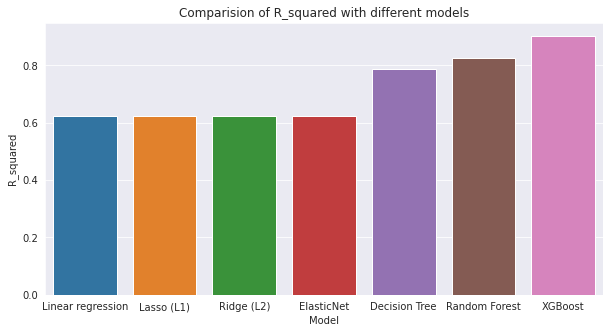

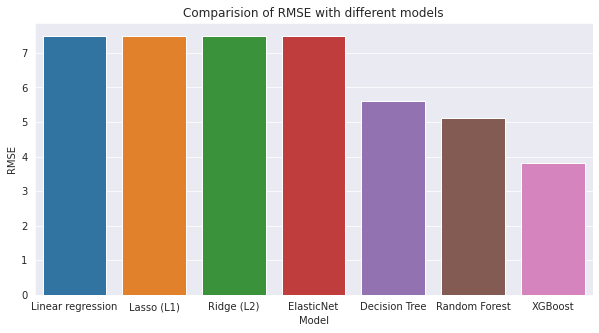

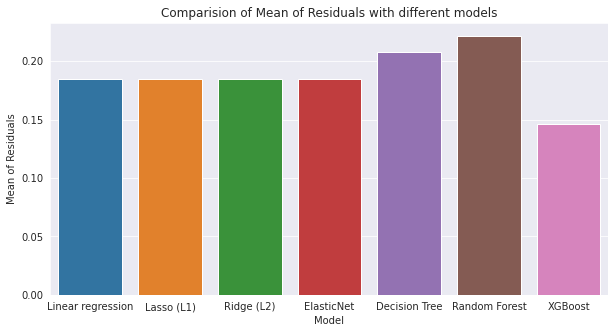

In [151]:
# Plotting bar plot to compare score and error of each model
for var in ['R_squared','RMSE','Mean of Residuals']:
    plt.figure(figsize=(10,5))
    ax=sns.barplot(x=evaluation_df['Model'],y=evaluation_df[var])
    ax.set_title(f'Comparision of {var} with different models')
    plt.show()

* The XGBoost regression model has the highest R-squared score, the lowest Root Mean Squared Error (RMSE), and has very close to having zero mean of residuals.

* Therefore, the XGBoost regression model is the ideal model and well-trained for forecasting the number of rented bikes required per hour based on the model's high accuracy, low error, and zero mean of residuals.

## **8. Model Explainability**

## Feature Importance

Feature Importance for XGBoost regression model

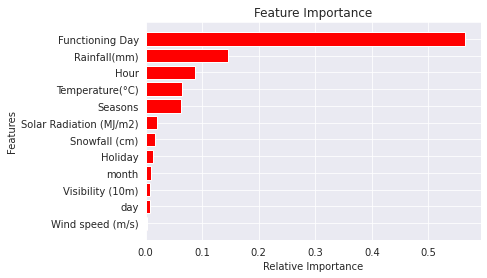

In [152]:
# Feature Importance for XGBoost regression model

# Create instance for independant features names
features = df[independent_variables].columns
# Creating object of feature importance
importances = xgb_reg.best_estimator_.feature_importances_
indices = np.argsort(importances)

# Plot the graph for important feature
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

A higher feature importance score for features : Functioning Days, Rainfall (mm), and Seasons, respectively, indicates that those specific features have a larger influence on the model used to forecast a certain variable, respectively.

## Model Explainability

Model Explainability for XGBoost regression model

In [161]:
# Install SHAP in environment


In [153]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.2 MB/s eta 0:00:00


In [154]:
# Import shap and other necessary libraries
import shap 
import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid') 

Permutation explainer: 1753it [04:17,  6.81it/s]


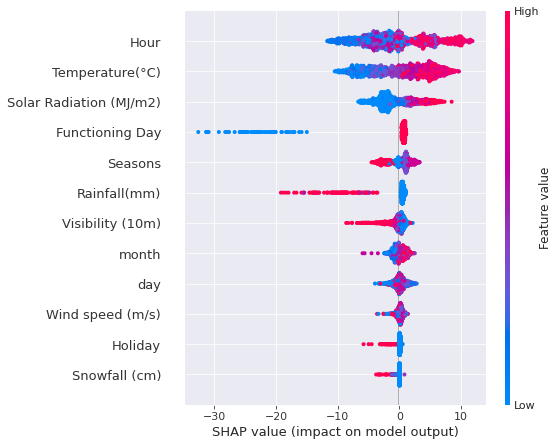

In [155]:
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_reg.predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=df[independent_variables].columns)


* The model-impacting features (Importance) are listed in descending order.

* For that particular feature, the blue values are low and the red-colored values are high.

* High values from the Hour, Temperature (°C), Solar Radiation (MJ/m2), and Functioning Day features have a positive impact on the model, while low values have a negative impact.

* High values of the variables for Wind speed (m/s), Holidays, Snowfall (cm), Visibility (10m), Seasons, and Rainfall (mm) have a negative impact on the model, while low values have a positive impact.

## **Conclusion**

**The following observations were made after importing and analyzing the data :**

* Customers favour rental motorcycles equally in all seasons.

* When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.

* Nearly all consumers preferred to rent bikes during functional hours.

* Bicycle rentals are popular all month long.

* Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.

* At night, customers do not prefer to use rented bikes.

* Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.

* Customers mostly use rented bikes for transportation in the evening.
 
* Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.

* When the humidity level is between 10% and 18%, people prefer to rent bikes.

* wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.

* Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.

* According to the graph, solar radiation has no effect on customer use of rented bikes.

* When it's not raining, people prefer rental bikes the most.

* When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.

* In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.

* In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

* The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.

* During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.

* Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.

* Almost every rented bike is used during its functional hours.

* The use of rented bikes increased by three times in 2018 compared to 2017.

* **The XGBoost regression model has the highest R-squared score, the lowest Root Mean Squared Error (RMSE), and has very close to having zero mean of residuals.**

* **As a result of the model's high accuracy, low error, and zero mean of residuals, the XGBoost regression model is the ideal and well-trained model for forecasting the number of rented bikes required per hour.**
